In [1]:

from scipy.stats import boxcox
import pandas as pd
import numpy as np
import seaborn as sns
# %matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
import numpy as np

<IPython.core.display.Javascript object>


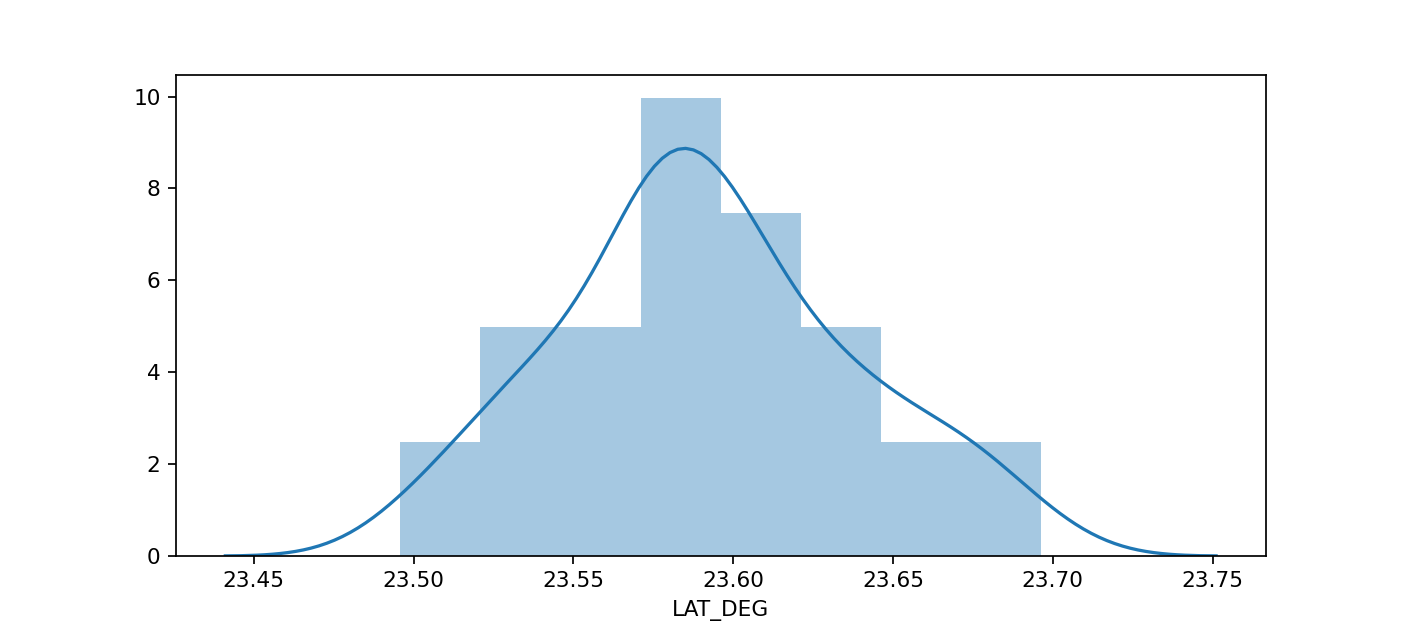

<IPython.core.display.Javascript object>


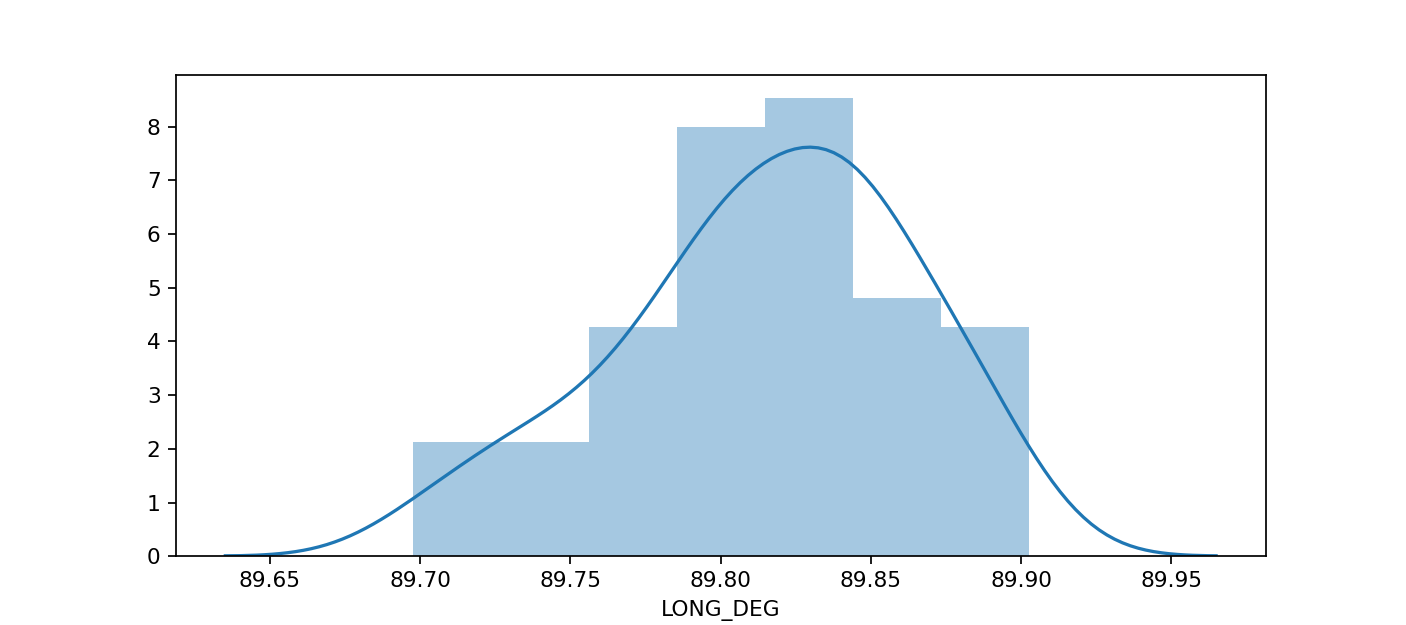

<IPython.core.display.Javascript object>


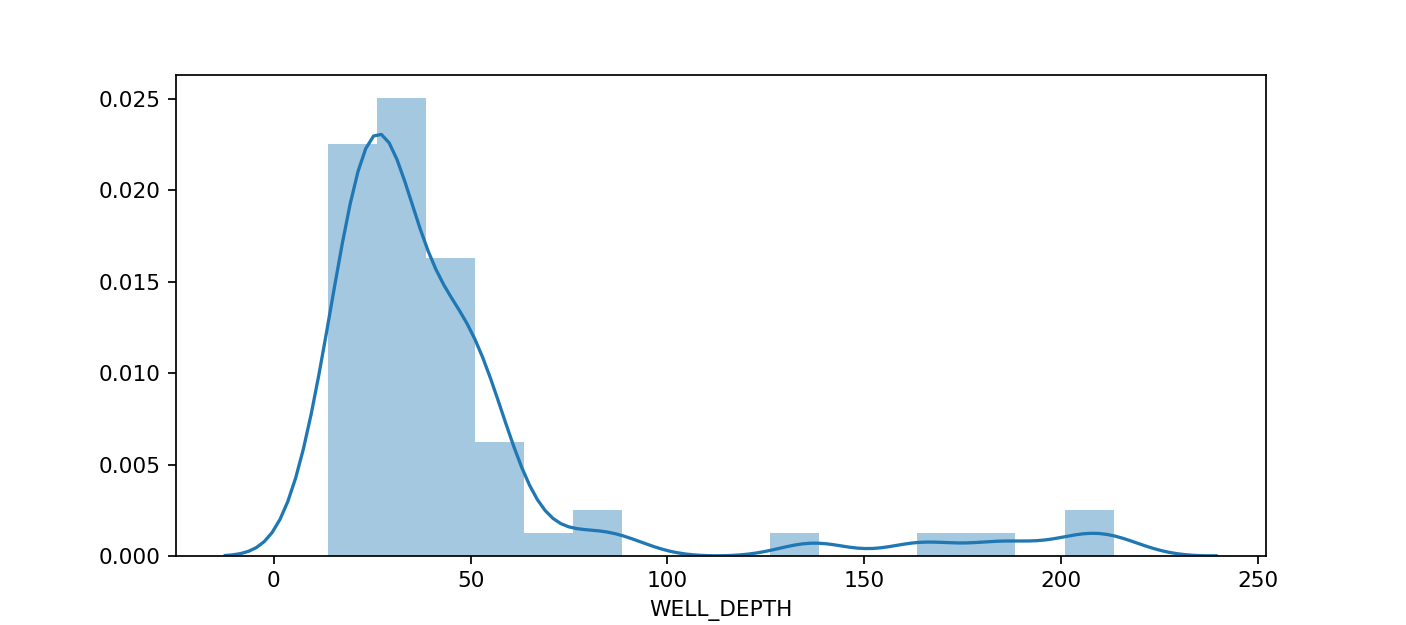

<IPython.core.display.Javascript object>


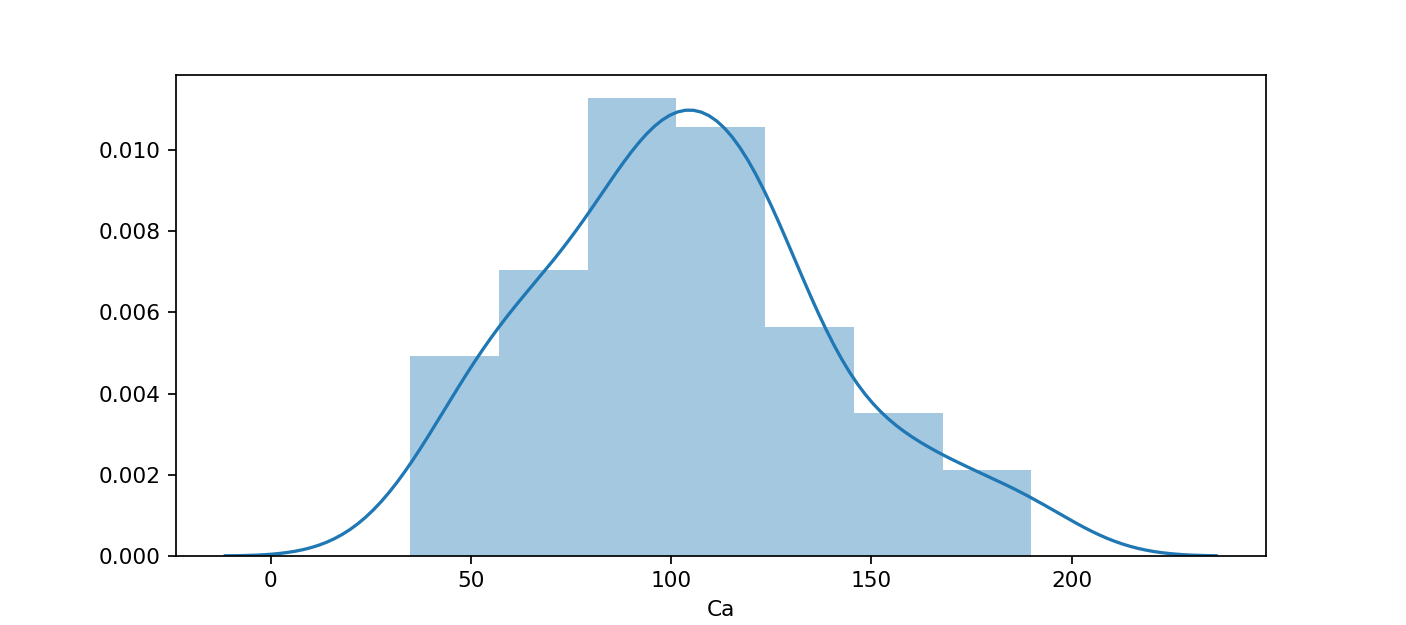

<IPython.core.display.Javascript object>


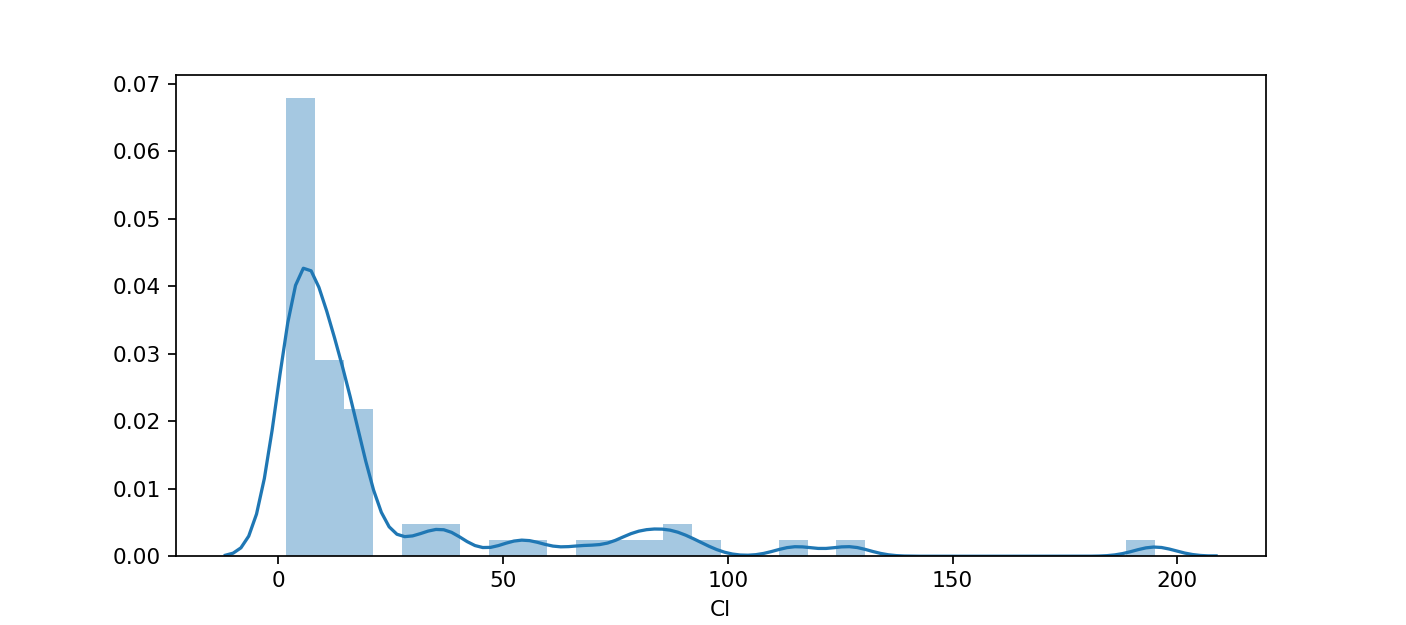

<IPython.core.display.Javascript object>


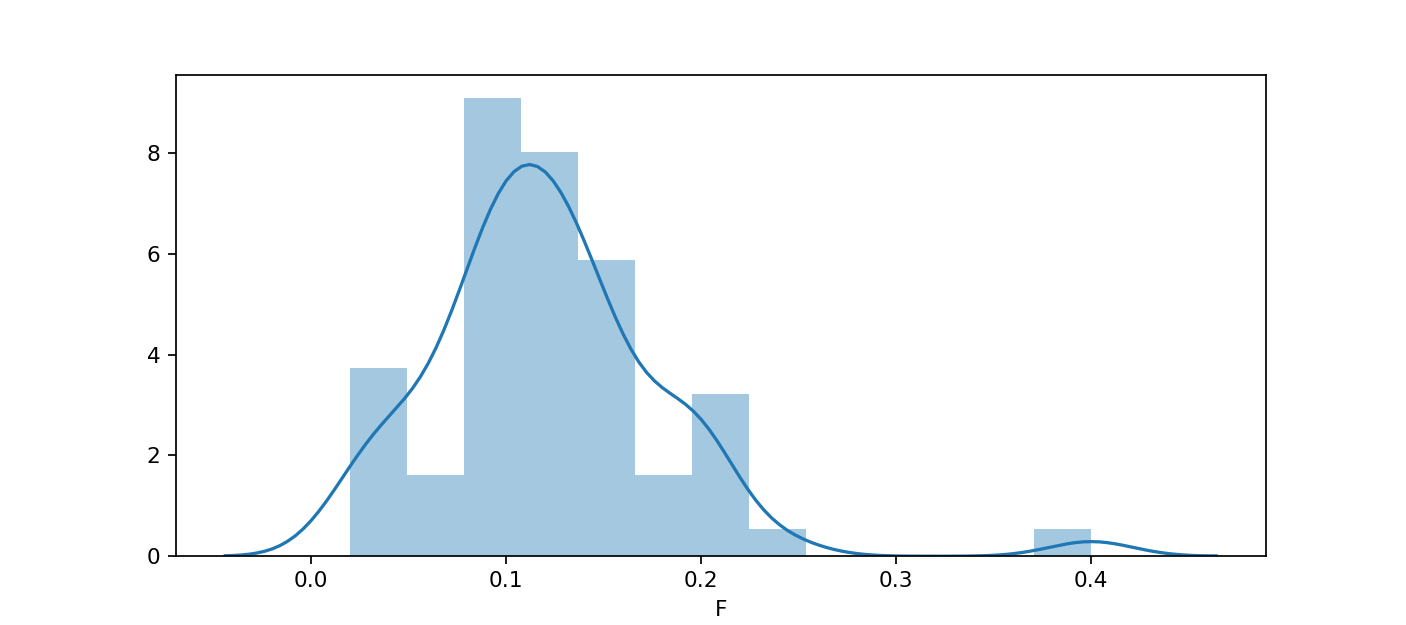

<IPython.core.display.Javascript object>


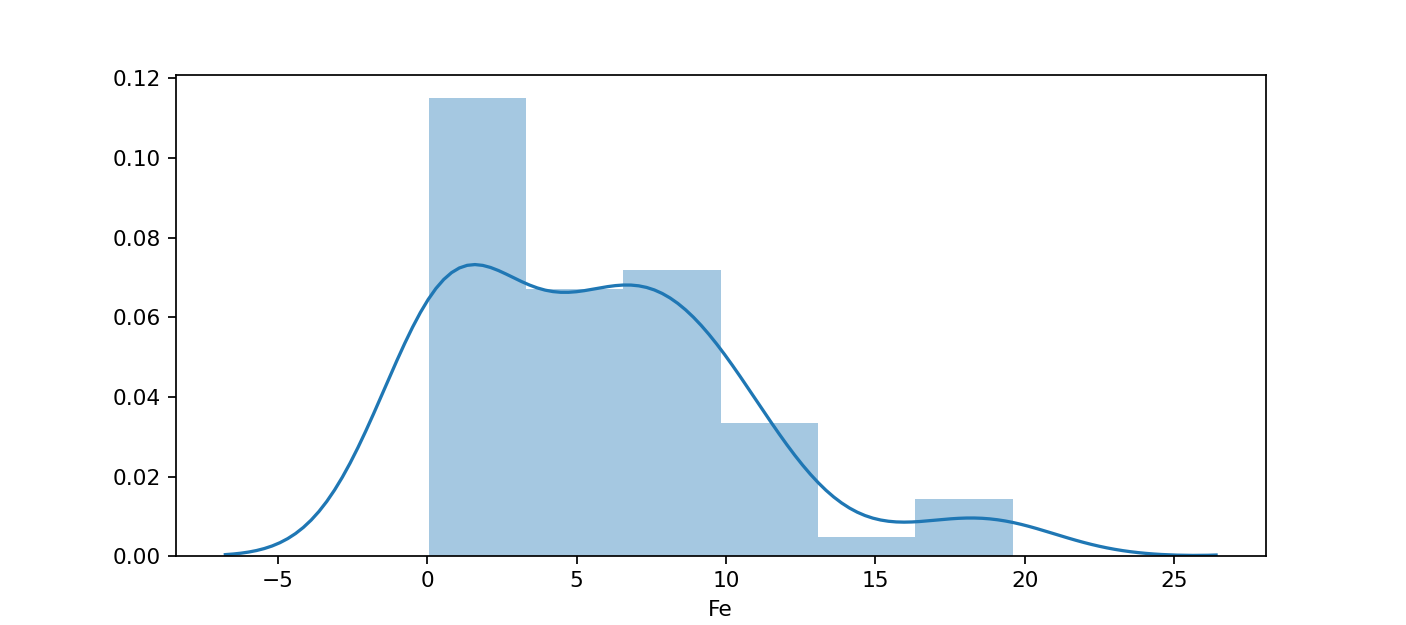

<IPython.core.display.Javascript object>


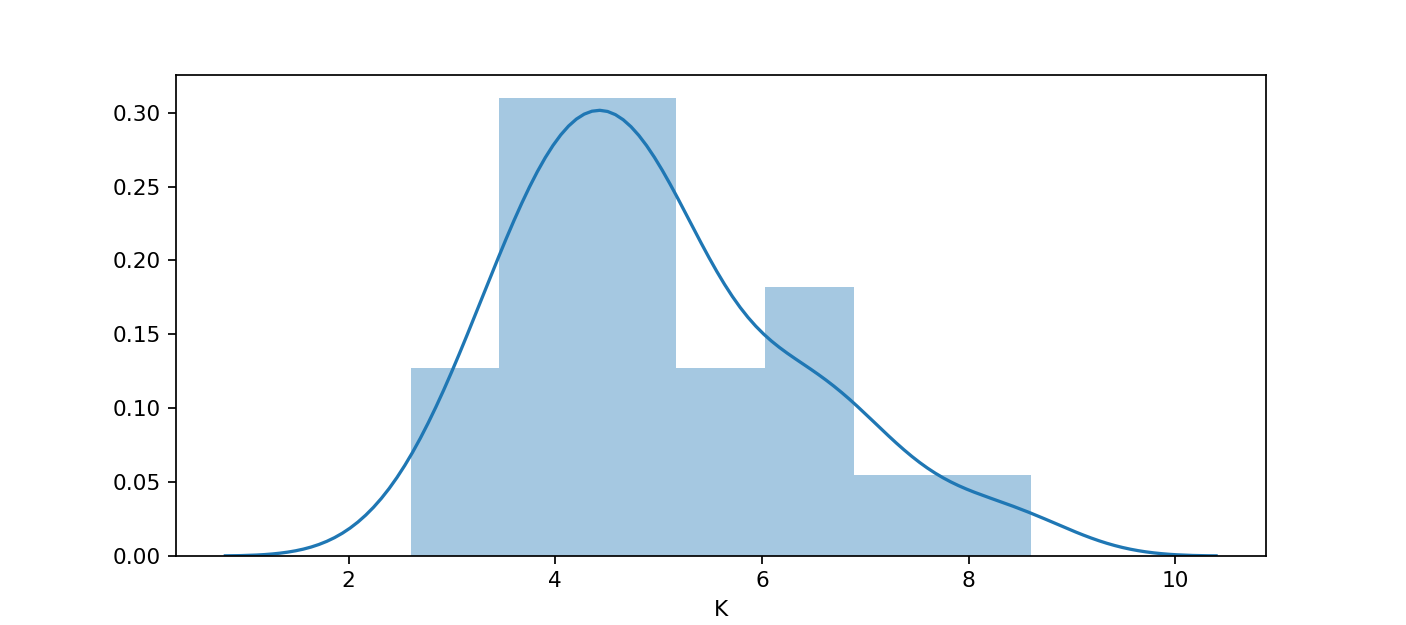

<IPython.core.display.Javascript object>


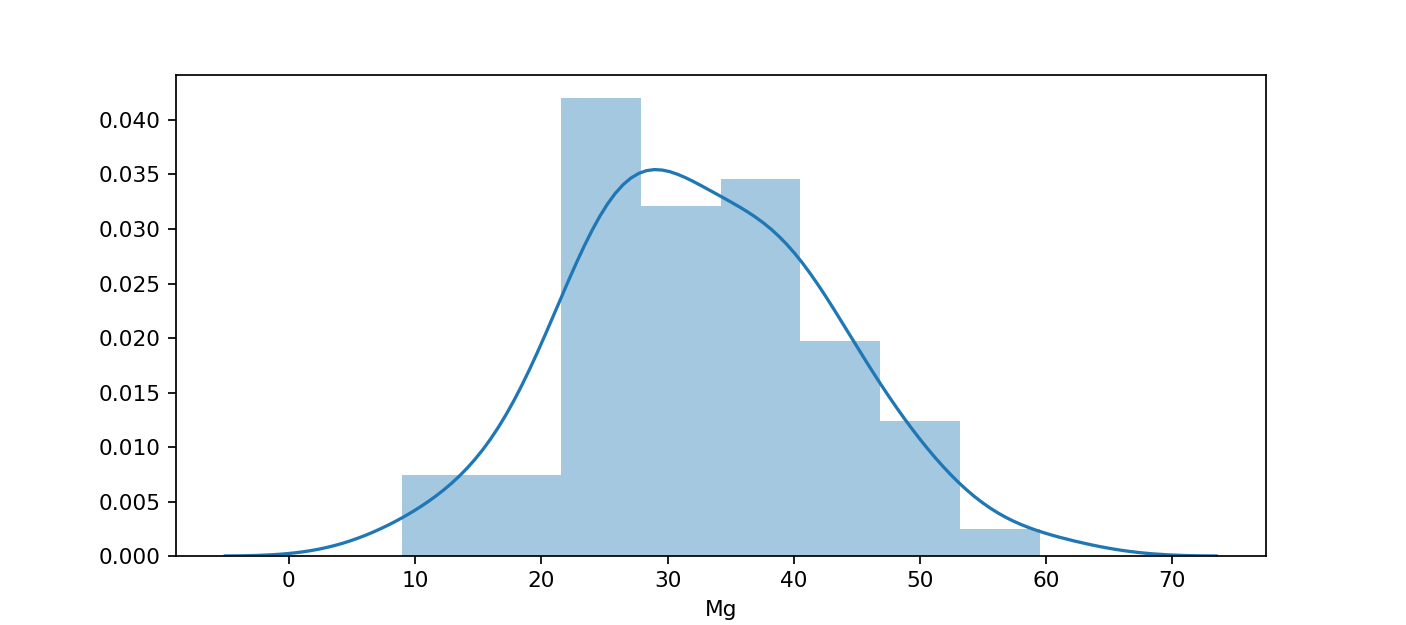

<IPython.core.display.Javascript object>


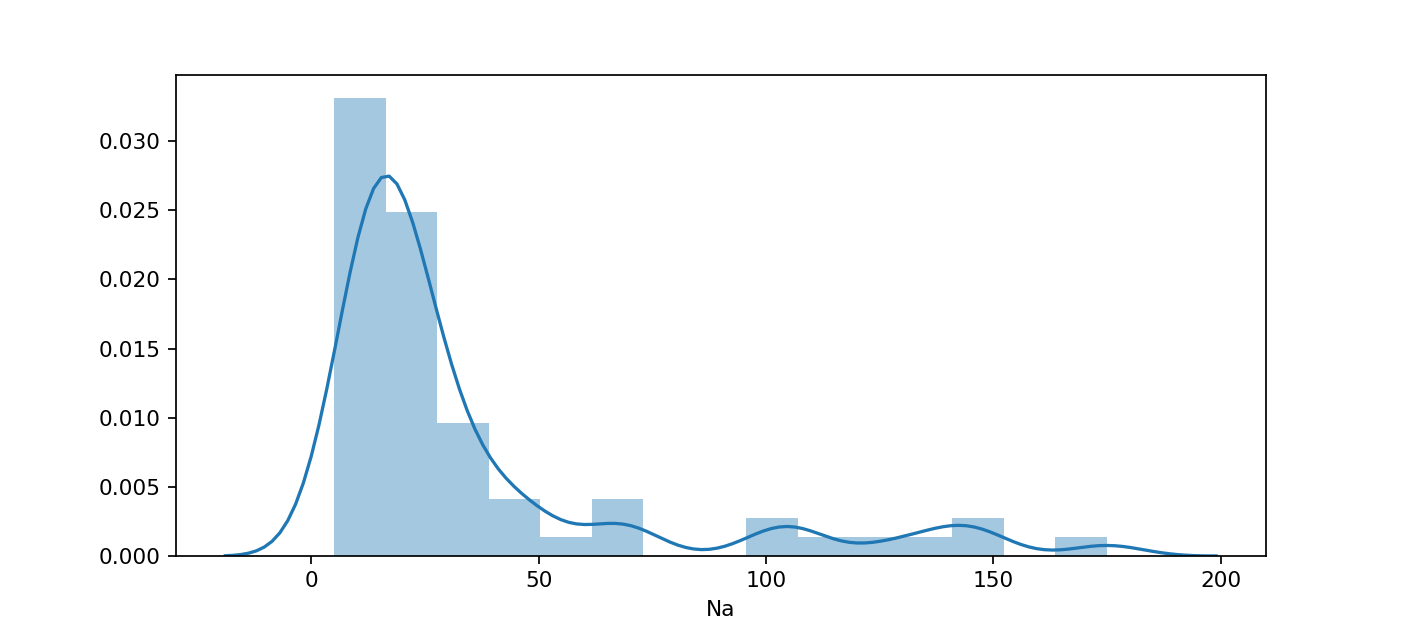

<IPython.core.display.Javascript object>


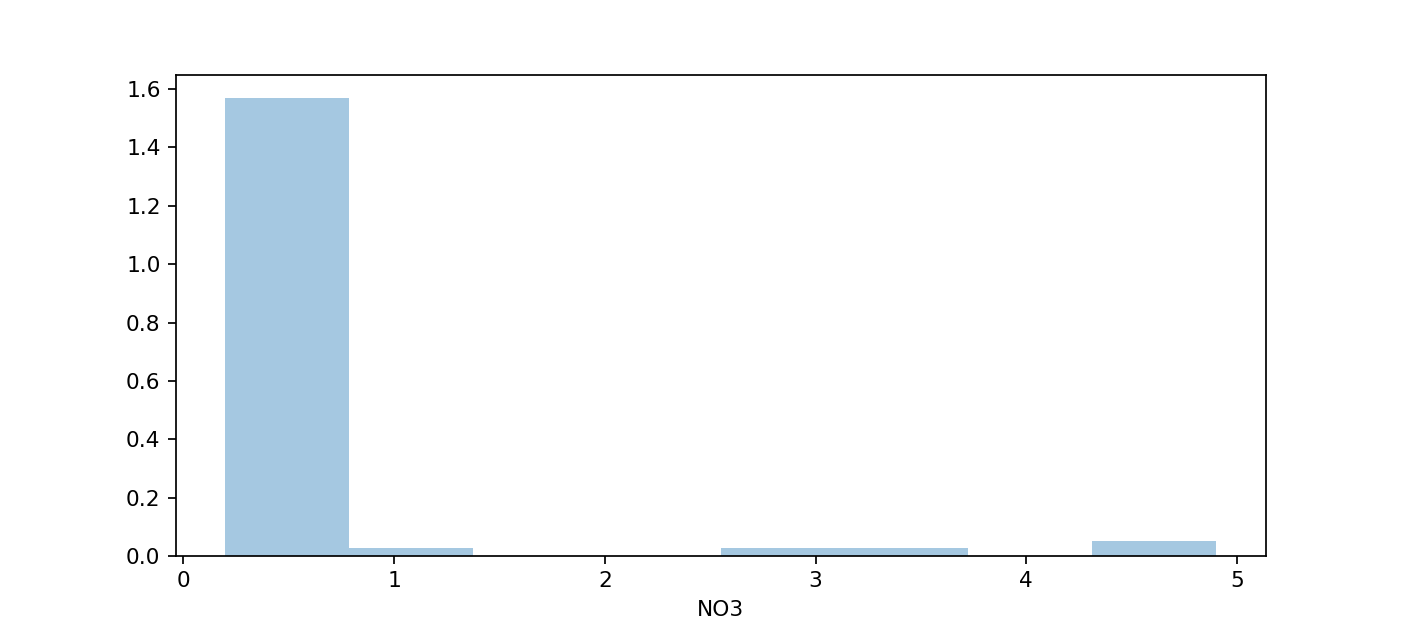

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>


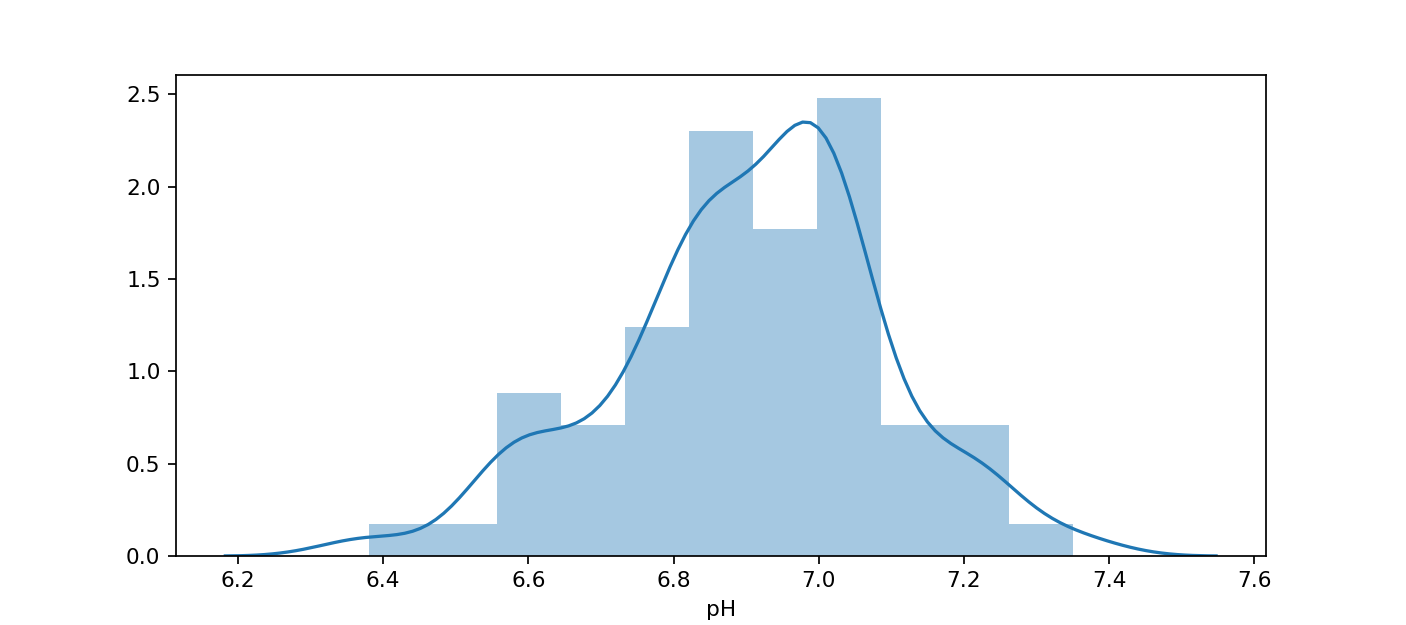

<IPython.core.display.Javascript object>


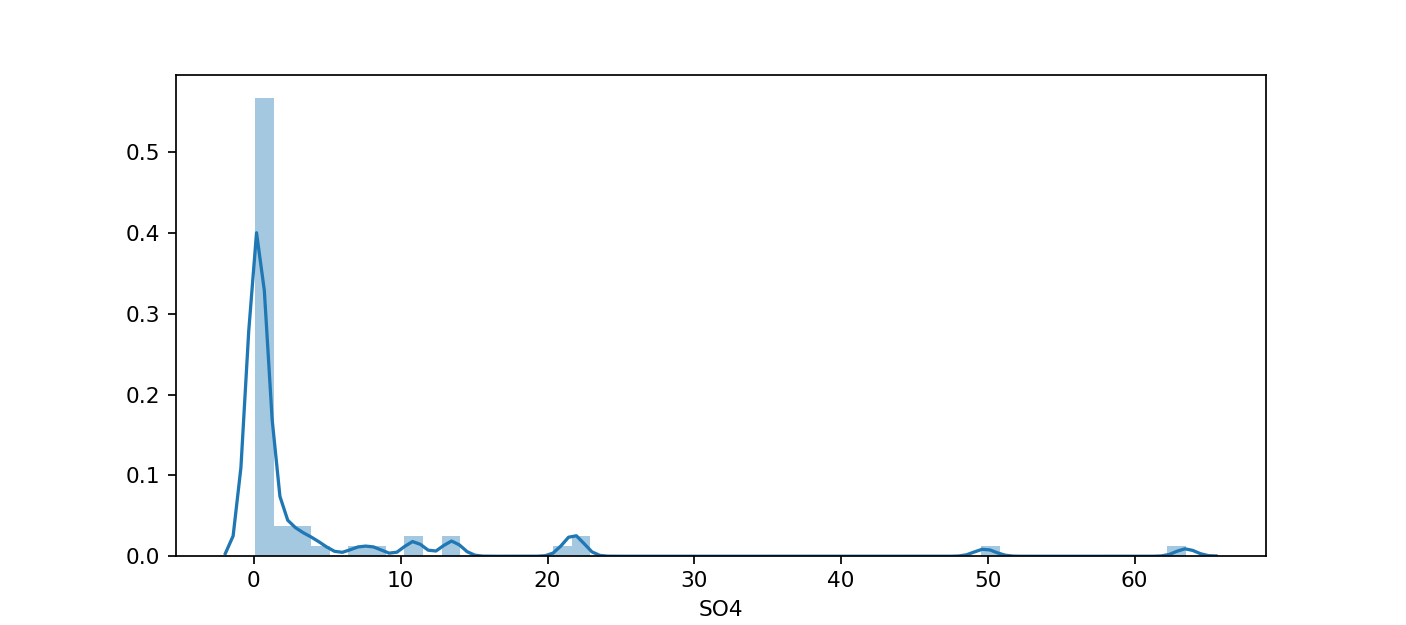

<IPython.core.display.Javascript object>


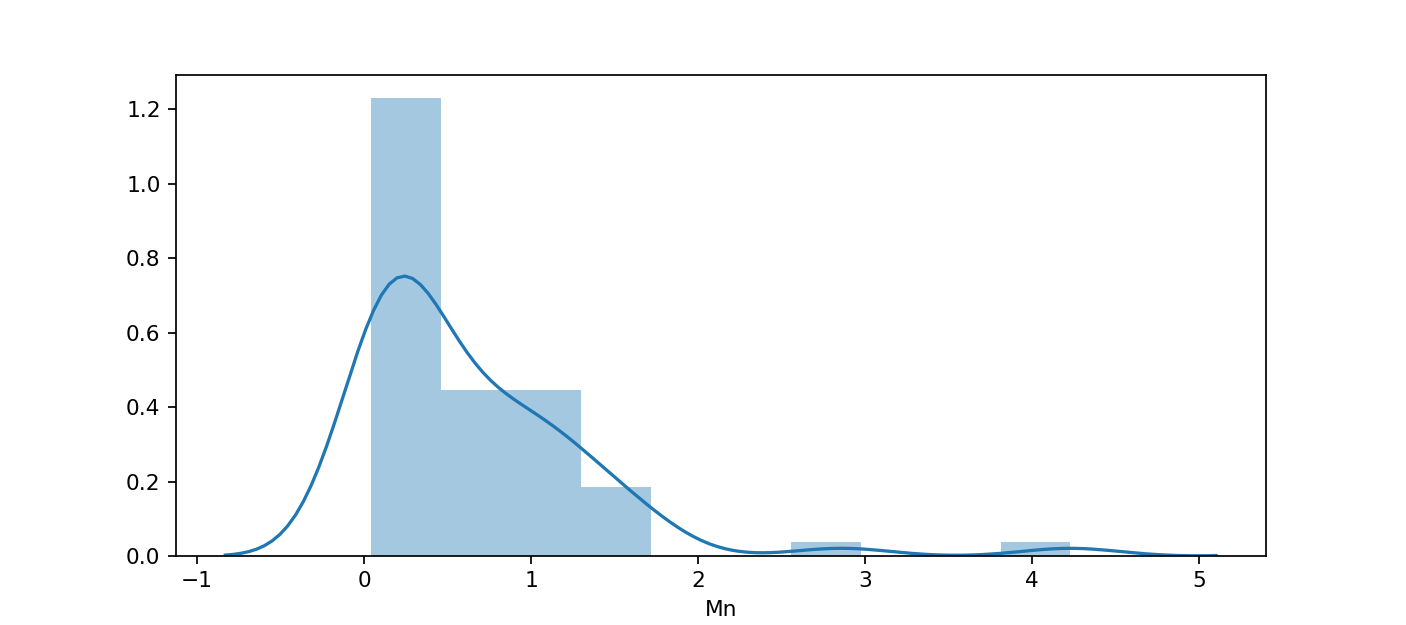

In [8]:
def plot_dist(pdf):
    for i, col in enumerate(pdf.select_dtypes([np.int,np.float]).columns):
        plt.figure(i, figsize=(9,4))
        sns.distplot(pdf[col])
        
        
plot_dist(df) 

In [10]:
df = pd.read_excel("water quality.xlsx")
df.iloc[0]["Mn"]


1.47

In [ ]:
df['date'] = df['Date'].apply(lambda x: datetime.strptime(x, "%d/%m/%Y"))
y = df.iloc[0]['date'].year
df['year-month'] = df['date'].apply(lambda x: int((x.year-y)*12+x.month))
df['year'] = df['date'].apply(lambda x: int(x.year))
df['month'] = df['date'].apply(lambda x: int(x.month))
df['day'] = df['date'].apply(lambda x: int(x.day))

In [4]:
df.groupby('UNION').apply(lambda x: x - x.mean())

,LAT_DEG,LONG_DEG,WELL_DEPTH,HCO3,Ca,Cl,F,Fe,K,Mg,Na,NO3,pH,SO4,Mn,AsIII
0,0.015025,0.020175,-75.862500,-116.750000,10.950000,-33.375000,0.016250,-3.623125,-0.412500,-9.400000,-37.300000,2.775558e-17,-0.123750,11.050000,0.871375,-129.625000
1,0.007825,0.028175,-72.862500,-7.750000,25.950000,-51.675000,0.216250,0.169875,-1.012500,-7.600000,-34.800000,2.775558e-17,0.206250,-2.250000,0.531375,853.375000
2,-0.006733,0.012200,7.033333,92.000000,13.933333,14.366667,0.083333,5.963333,0.100000,7.966667,6.466667,-2.775558e-17,-0.010000,1.666667,0.119333,11.000000
3,0.006725,0.009275,-81.362500,-19.750000,-0.050000,-44.475000,-0.083750,-3.126125,1.287500,-6.600000,-28.900000,2.775558e-17,-0.143750,1.450000,0.400375,-132.625000
4,-0.010171,-0.019614,3.428571,11.285714,-12.671429,5.371429,0.098571,2.028571,-0.014286,4.642857,13.271429,3.185714e+00,-0.137143,0.242857,-0.287571,-54.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.019238,0.015838,-35.176923,-103.846154,-10.776923,-27.323077,-0.007692,7.688462,-1.353846,5.676923,-53.407692,0.000000e+00,-0.348462,0.169231,0.083077,-18.461538
60,0.012180,-0.003900,-5.940000,39.200000,-8.700000,-20.980000,-0.016000,0.257600,-0.780000,3.640000,-5.860000,0.000000e+00,-0.158000,-14.180000,0.117000,-3.600000
61,-0.009975,-0.022325,-50.262500,-51.750000,-39.650000,-53.475000,0.016250,4.199875,-0.112500,-0.900000,-20.800000,2.775558e-17,-0.113750,-2.350000,-0.520625,-62.625000
62,0.003625,0.005675,84.737500,80.250000,-10.050000,17.225000,-0.033750,-0.540125,-0.312500,3.900000,48.200000,2.775558e-17,-0.083750,-2.350000,-0.017625,-132.625000


In [9]:
df.UNION.str.len()


0     19
1     19
2      9
3     19
4      7
      ..
59     7
60     7
61    19
62    19
63     7
Name: UNION, Length: 64, dtype: int64

In [10]:
df.UNION.replace('Aliabad','aaa')

0     Faridpur Paurashava
1     Faridpur Paurashava
2               Ambikapur
3     Faridpur Paurashava
4                     aaa
             ...         
59                Kaijuri
60                Majchar
61    Faridpur Paurashava
62    Faridpur Paurashava
63                    aaa
Name: UNION, Length: 64, dtype: object

In [26]:
 df[df.UNION.str.contains('Aliabad')]

,LAT_DEG,LONG_DEG,UNION,WELL_DEPTH,HCO3,Ca,Cl,F,Fe,K,Mg,Na,NO3,pH,SO4,Mn,AsIII
4,23.5689,89.8536,Aliabad,45.7,561,88.4,13.5,0.24,7.68,5.0,40.0,36.6,4.7,6.82,0.5,0.080,4
15,23.5747,89.8825,Aliabad,40.5,566,95.7,7.6,0.11,8.83,5.1,39.6,25.0,0.2,6.99,0.1,0.127,200
16,23.5586,89.9025,Aliabad,41.1,714,167.0,5.5,0.14,1.10,4.4,34.3,16.4,0.2,7.10,0.5,0.700,4
17,23.5969,89.8769,Aliabad,20.1,553,129.0,3.8,0.10,2.21,3.9,25.9,9.6,0.2,7.03,0.4,1.260,17
44,23.5783,89.8942,Aliabad,48.8,773,138.0,17.7,0.08,10.10,6.8,59.5,21.8,4.9,6.79,0.1,0.121,4
56,23.5842,89.8611,Aliabad,49.7,249,34.8,4.0,0.16,3.37,3.8,17.2,21.7,0.2,7.09,0.1,0.149,92
63,23.5919,89.8417,Aliabad,50.0,432,54.6,4.8,0.16,6.27,6.1,31.0,32.2,0.2,6.88,0.1,0.136,90


In [27]:
df.loc[df['UNION'] == 'Aliabad']

,LAT_DEG,LONG_DEG,UNION,WELL_DEPTH,HCO3,Ca,Cl,F,Fe,K,Mg,Na,NO3,pH,SO4,Mn,AsIII
4,23.5689,89.8536,Aliabad,45.7,561,88.4,13.5,0.24,7.68,5.0,40.0,36.6,4.7,6.82,0.5,0.080,4
15,23.5747,89.8825,Aliabad,40.5,566,95.7,7.6,0.11,8.83,5.1,39.6,25.0,0.2,6.99,0.1,0.127,200
16,23.5586,89.9025,Aliabad,41.1,714,167.0,5.5,0.14,1.10,4.4,34.3,16.4,0.2,7.10,0.5,0.700,4
17,23.5969,89.8769,Aliabad,20.1,553,129.0,3.8,0.10,2.21,3.9,25.9,9.6,0.2,7.03,0.4,1.260,17
44,23.5783,89.8942,Aliabad,48.8,773,138.0,17.7,0.08,10.10,6.8,59.5,21.8,4.9,6.79,0.1,0.121,4
56,23.5842,89.8611,Aliabad,49.7,249,34.8,4.0,0.16,3.37,3.8,17.2,21.7,0.2,7.09,0.1,0.149,92
63,23.5919,89.8417,Aliabad,50.0,432,54.6,4.8,0.16,6.27,6.1,31.0,32.2,0.2,6.88,0.1,0.136,90


<IPython.core.display.Javascript object>


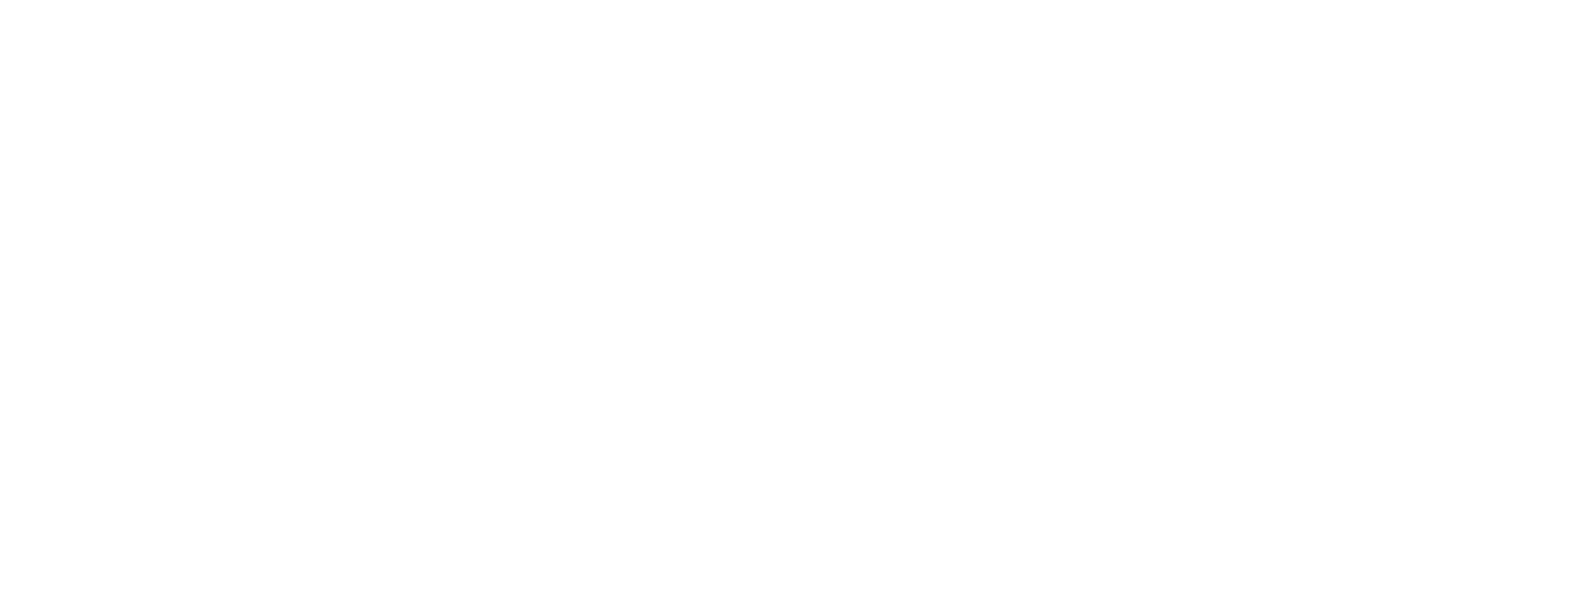

<IPython.core.display.Javascript object>


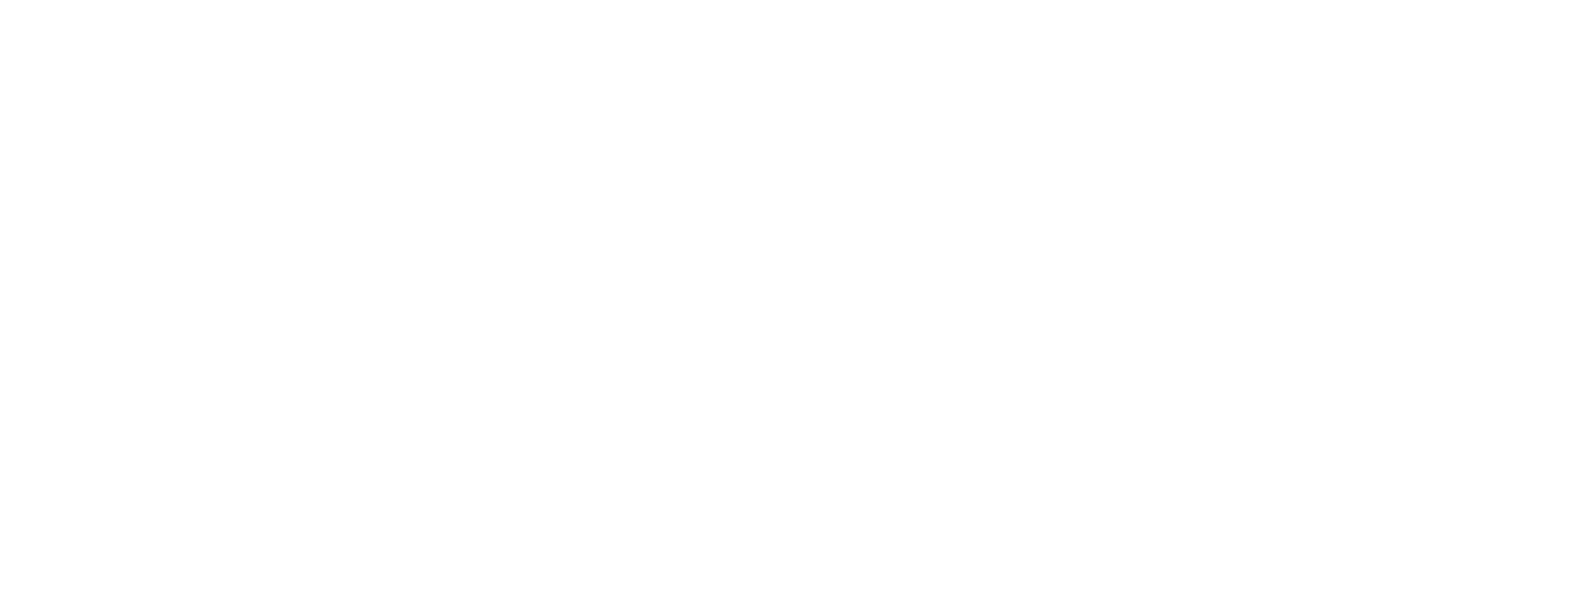

In [39]:
plt.figure(figsize=(16,6))
plt.subplot(121)
normal_rets = np.random.normal(0, 1, (100000, 1))
sns.distplot(normal_rets)

# plt.subplot(122)
# sns.distplot(df.Mn)

In [67]:
df.Mn.agg(['mean','median'])

mean      0.656109
median    0.389000
Name: Mn, dtype: float64

In [77]:
df.skew()

LAT_DEG       0.201791
LONG_DEG     -0.453848
WELL_DEPTH    2.748803
HCO3         -0.104736
Ca            0.378794
Cl            2.581103
F             1.489871
Fe            0.912829
K             0.738517
Mg            0.174392
Na            2.048597
NO3           3.949536
pH           -0.334684
SO4           3.962840
Mn            2.525428
AsIII         6.561250
dtype: float64

In [84]:
df.kurtosis()

LAT_DEG       -0.335218
LONG_DEG      -0.335813
WELL_DEPTH     7.320329
HCO3           0.655510
Ca            -0.057717
Cl             7.523142
F              5.685014
Fe             0.626452
K              0.120133
Mg            -0.043214
Na             3.381271
NO3           14.899421
pH             0.381011
SO4           17.418376
Mn             9.361532
AsIII         48.035311
dtype: float64

# logtransform

In [98]:
x =np.log1p(df.Mn)     #log1p
x

0     0.904218
1     0.756122
2     0.756122
3     0.692647
4     0.076961
        ...   
59    0.219938
60    0.599935
61    0.075107
62    0.458058
63    0.127513
Name: Mn, Length: 64, dtype: float64

In [99]:
np.expm1(x)         # opposite

0     1.470
1     1.130
2     1.130
3     0.999
4     0.080
      ...  
59    0.246
60    0.822
61    0.078
62    0.581
63    0.136
Name: Mn, Length: 64, dtype: float64

In [100]:
skf = df.skew()
skf = skf[abs(skf)>.75].index

In [101]:
df[skf]=np.log(df[skf])

In [102]:
df

,LAT_DEG,LONG_DEG,UNION,WELL_DEPTH,HCO3,Ca,Cl,F,Fe,K,Mg,Na,NO3,pH,SO4,Mn,AsIII
0,23.6147,89.8553,Faridpur Paurashava,3.194583,471,127.0,3.317816,-1.609438,-0.805197,4.5,27.8,3.113515,-1.609438,6.84,2.602690,0.385262,1.945910
1,23.6075,89.8633,Faridpur Paurashava,3.310543,580,142.0,2.230014,-0.916291,1.444563,3.9,29.6,3.218876,-1.609438,7.17,-1.609438,0.122218,6.897705
2,23.6031,89.8272,Ambikapur,3.600048,529,116.0,3.523415,-1.609438,2.261763,3.9,32.5,2.944439,-1.609438,6.99,2.104134,0.122218,3.295837
3,23.6064,89.8444,Faridpur Paurashava,2.939162,568,116.0,2.803360,-2.302585,-0.057629,6.2,30.6,3.430756,-1.609438,6.82,1.360977,-0.001001,1.386294
4,23.5689,89.8536,Aliabad,3.822098,561,88.4,2.602690,-1.427116,2.038620,5.0,40.0,3.600048,1.547563,6.82,-0.693147,-2.525729,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,23.5789,89.8411,Kaijuri,3.465736,485,67.9,2.541602,-1.966113,2.912351,4.2,44.0,2.923162,-1.609438,6.38,-0.693147,-1.402424,2.772589
60,23.6339,89.7581,Majchar,2.821379,485,103.0,1.568616,-2.525729,-0.128970,3.2,29.8,2.272126,-1.609438,6.83,-2.302585,-0.196015,1.386294
61,23.5897,89.8128,Faridpur Paurashava,3.912023,536,76.4,2.014903,-1.609438,2.112635,4.8,36.3,3.663562,-1.609438,6.85,-2.302585,-2.551046,4.304065
62,23.6033,89.8408,Faridpur Paurashava,5.220356,668,106.0,4.359270,-1.897120,1.261298,4.6,41.1,4.682131,-1.609438,6.88,-2.302585,-0.543005,1.386294


In [103]:
df.skew()

LAT_DEG       0.201791
LONG_DEG     -0.453848
WELL_DEPTH    1.103863
HCO3         -0.104736
Ca            0.378794
Cl            0.523407
F            -0.981872
Fe           -0.893803
K             0.738517
Mg            0.174392
Na            0.720258
NO3           3.360537
pH           -0.334684
SO4           0.924571
Mn           -0.020917
AsIII         0.798635
dtype: float64

In [104]:
df.Mn.agg(['mean','median'])

mean     -0.967887
median   -0.944295
Name: Mn, dtype: float64

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


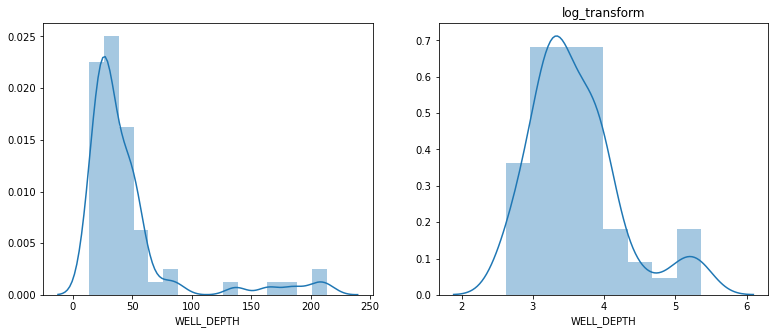

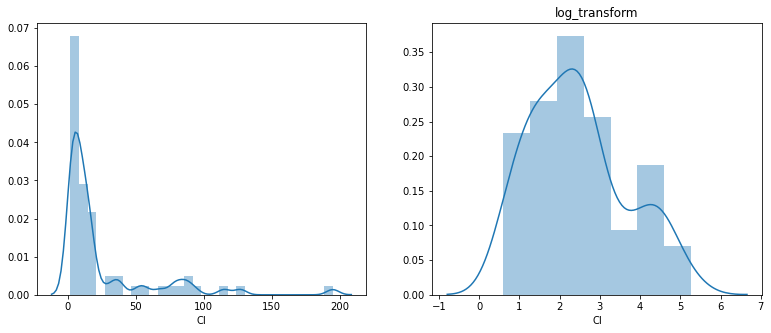

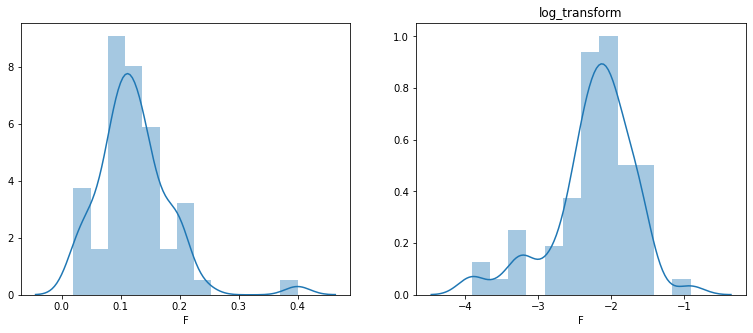

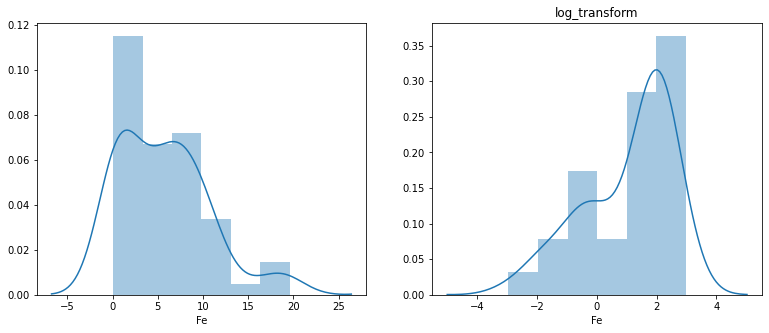

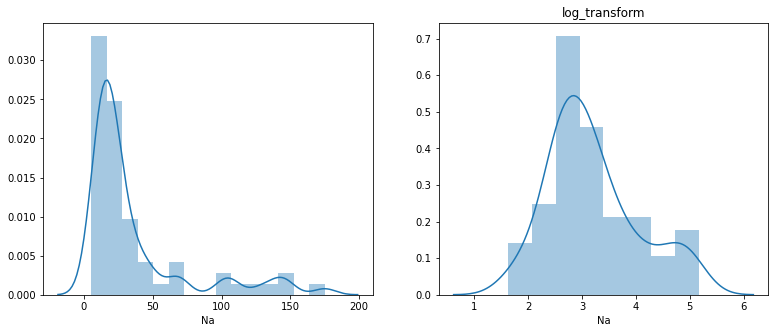

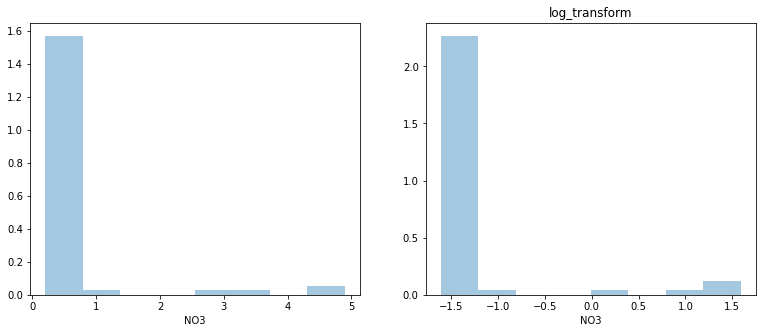

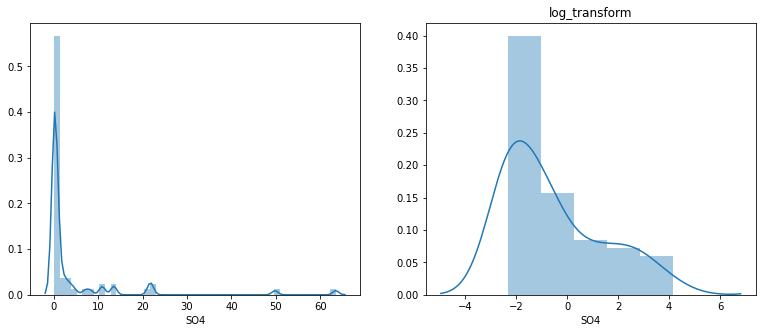

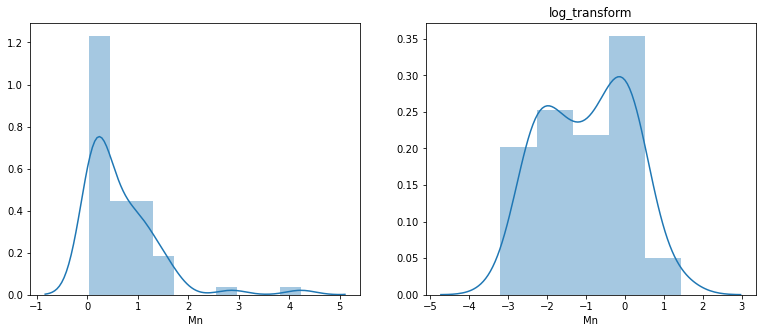

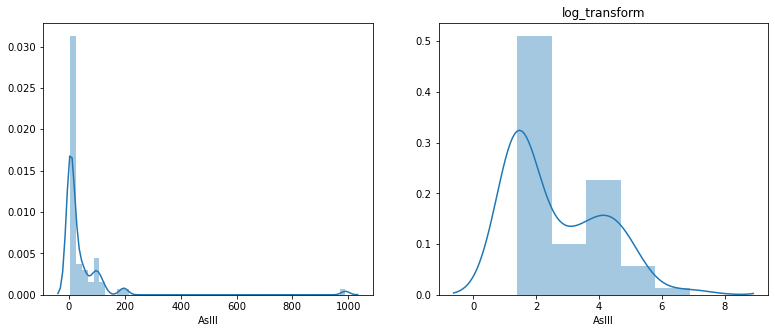

In [114]:
df = pd.read_excel("water quality.xlsx")

def log_plots(df,col):
    plt.figure(figsize = (13,5))
    plt.subplot(121)
    sns.distplot(df[col])
    

    plt.subplot(122)
    sns.distplot(np.log(df[col]))
    plt.title('log_transform')
 

for cl in skf:
    log_plots(df,cl)

In [54]:
# nmf= df.dtypes[df.dtypes != 'object'].index


In [43]:

# df.plot(kind='density',figsize = (25,35), subplots=True,layout = (6,3), sharey=False,sharex=False, fontsize=11) 
# plt.show()

# Box-COX

In [108]:
df[skf]=PowerTransformer('box-cox').fit_transform(df[skf])


In [109]:
df.skew()

LAT_DEG       0.201791
LONG_DEG     -0.453848
WELL_DEPTH    0.043316
HCO3         -0.104736
Ca            0.378794
Cl            0.074825
F             0.066252
Fe           -0.233184
K             0.738517
Mg            0.174392
Na            0.046008
NO3           2.856668
pH           -0.334684
SO4           0.317300
Mn           -0.004412
AsIII         0.358714
dtype: float64

In [110]:
df.kurtosis()

LAT_DEG      -0.335218
LONG_DEG     -0.335813
WELL_DEPTH   -0.129109
HCO3          0.655510
Ca           -0.057717
Cl           -0.793944
F             1.352820
Fe           -1.066904
K             0.120133
Mg           -0.043214
Na           -0.181972
NO3           6.362577
pH            0.381011
SO4          -1.360591
Mn           -1.078902
AsIII        -1.661087
dtype: float64

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


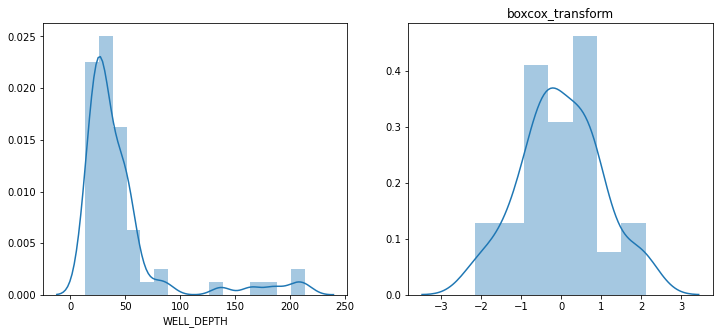

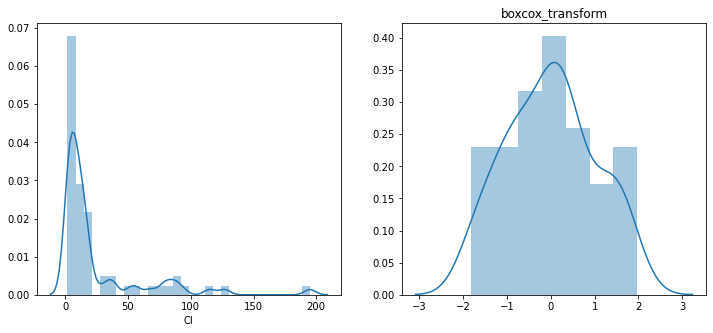

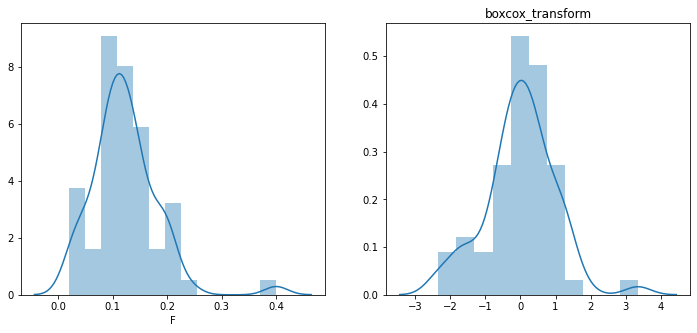

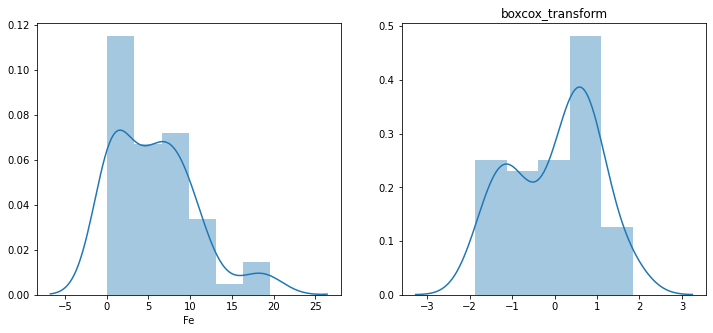

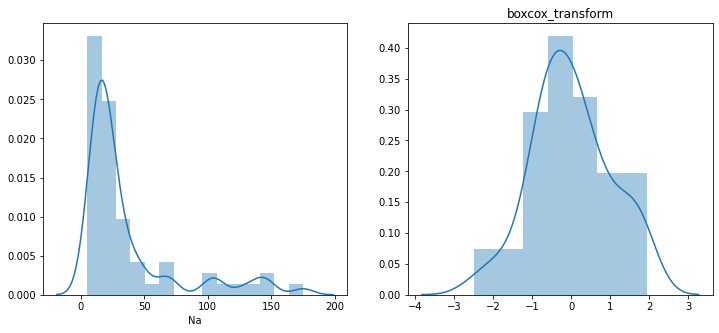

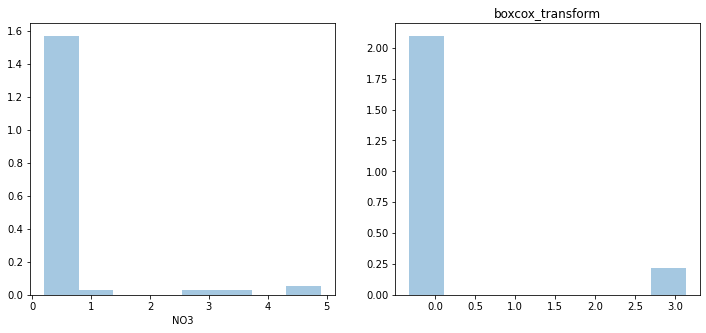

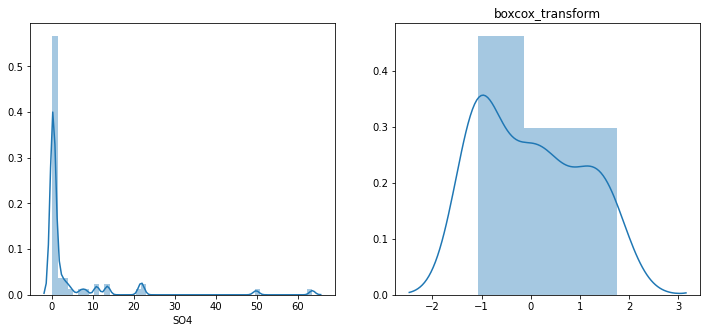

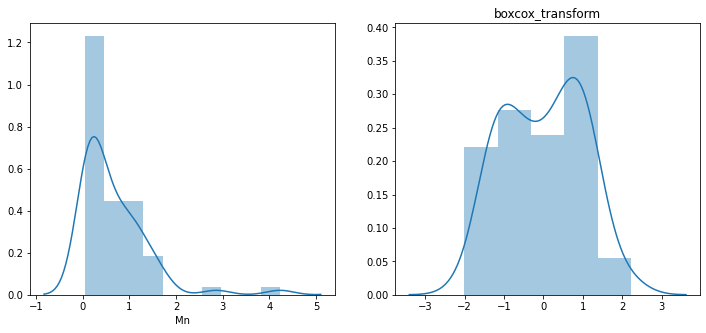

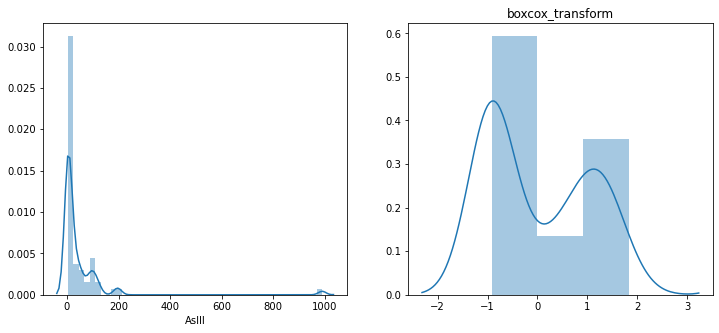

In [112]:
df = pd.read_excel("water quality.xlsx")

def box_coxplots(df,col):
    plt.figure(figsize = (12,5))
    
    
    plt.subplot(121)
    sns.distplot(df[col])
    
   

    plt.subplot(122)
    x=PowerTransformer('box-cox').fit_transform(df[[col]]).reshape(-1,1)
    sns.distplot(x)
    plt.title('boxcox_transform')
 

for cl in skf:
    box_coxplots(df,cl)

In [ ]:
lam = -.436

for feat in skf:
    df[feat] = boxcox(df[feat],lam)

In [116]:
box = PowerTransformer('box-cox')
box.fit_transform(df[skf])
box.lambdas_

array([-0.60033801, -0.21085807,  0.46347872,  0.36067612, -0.35520839,
       -4.38730475, -0.32272866,  0.01081614, -0.41363366])

In [ ]:
import numpy as np 
from scipy import stats 
  
# plotting modules 
import seaborn as sns 
import matplotlib.pyplot as plt 
  
# generate non-normal data (exponential) 
original_data = df.AsIII
  
# transform training data & save lambda value 
fitted_data, fitted_lambda = stats.boxcox(df.AsIII) 

  
# creating axes to draw plots 
fig, ax = plt.subplots(1, 2) 
  
# plotting the original data(non-normal) and  
# fitted data (normal) 
sns.distplot(original_data, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Non-Normal", color ="green", ax = ax[0]) 
  
sns.distplot(fitted_data, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Normal", color ="green", ax = ax[1]) 
  
# adding legends to the subplots 
plt.legend(loc = "upper right") 
  
# rescaling the subplots 
fig.set_figheight(5) 
fig.set_figwidth(10) 
  
print(f"Lambda value used for Transformation: {fitted_lambda}") 

# Plot

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

<IPython.core.display.Javascript object>


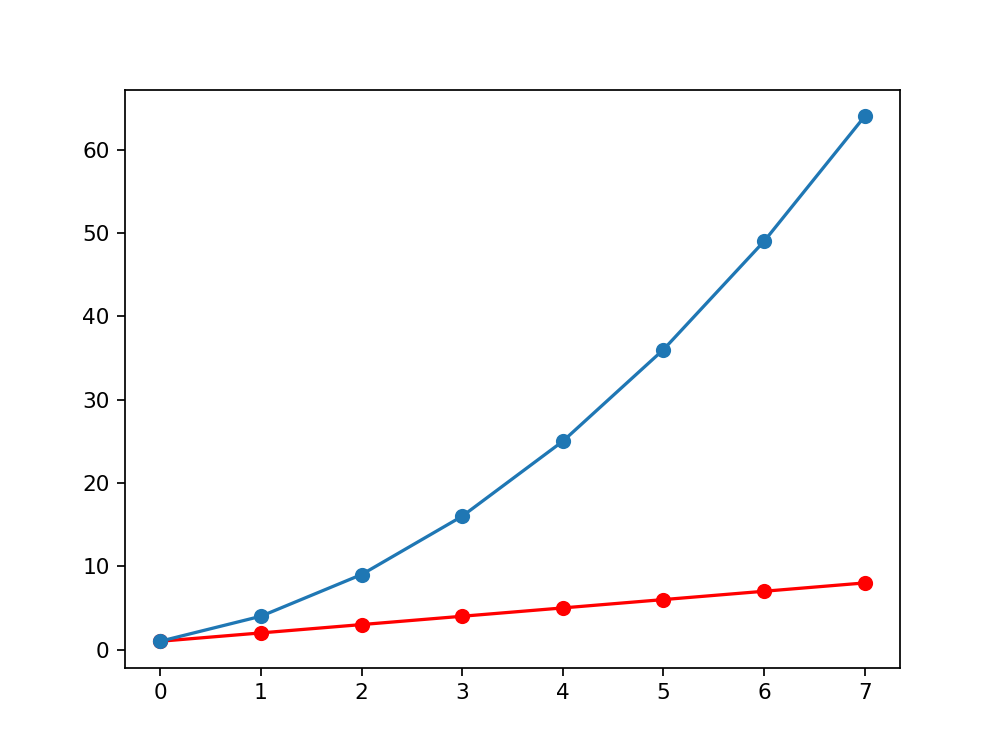

In [22]:
linear_data = np.array([1,2,3,4,5,6,7,8])
exponential_data = linear_data**2

plt.figure()
# plot the linear data and the exponential data
plt.plot(linear_data, '-or', exponential_data, '-o')

In [4]:
df = pd.read_excel("water quality.xlsx")
df.head(5)

,LAT_DEG,LONG_DEG,UNION,WELL_DEPTH,HCO3,Ca,Cl,F,Fe,K,Mg,Na,NO3,pH,SO4,Mn,AsIII
0,23.6147,89.8553,Faridpur Paurashava,24.4,471,127.0,27.6,0.20,0.447,4.5,27.8,22.5,0.2,6.84,13.5,1.470,7
1,23.6075,89.8633,Faridpur Paurashava,27.4,580,142.0,9.3,0.40,4.240,3.9,29.6,25.0,0.2,7.17,0.2,1.130,990
2,23.6031,89.8272,Ambikapur,36.6,529,116.0,33.9,0.20,9.600,3.9,32.5,19.0,0.2,6.99,8.2,1.130,27
3,23.6064,89.8444,Faridpur Paurashava,18.9,568,116.0,16.5,0.10,0.944,6.2,30.6,30.9,0.2,6.82,3.9,0.999,4
4,23.5689,89.8536,Aliabad,45.7,561,88.4,13.5,0.24,7.680,5.0,40.0,36.6,4.7,6.82,0.5,0.080,4


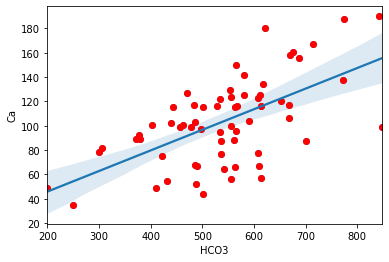

In [9]:
plt.figure()
plt.plot(df.HCO3,df.Ca,'or')
sns.regplot(df.HCO3,df.Ca)

<IPython.core.display.Javascript object>


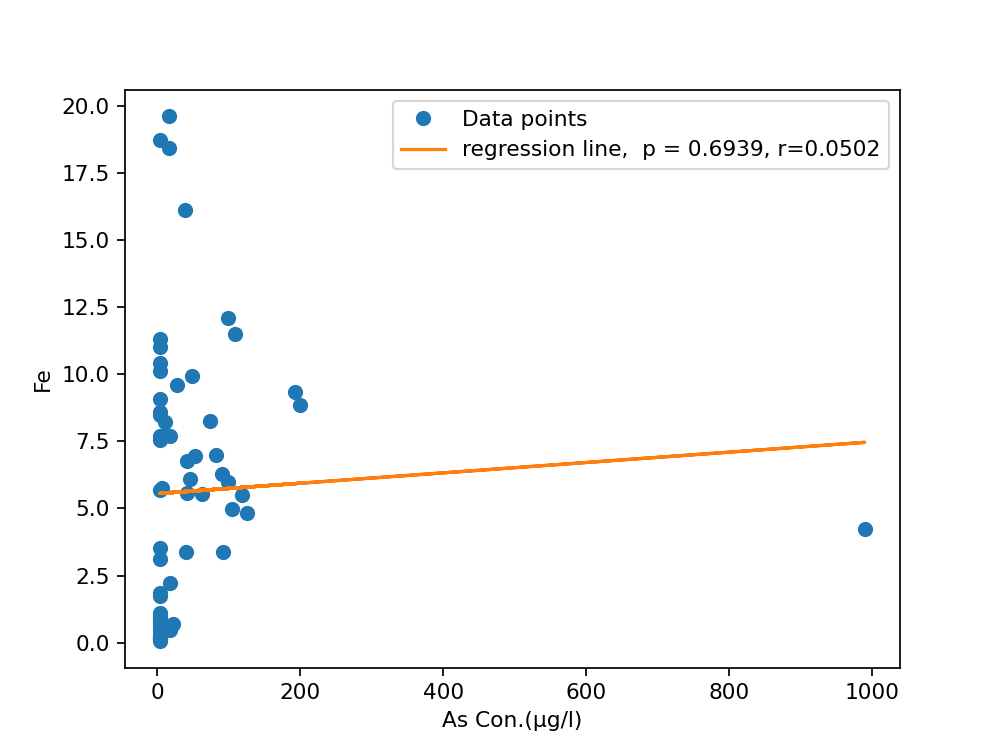

In [37]:
x=df["AsIII"]
# x = x.astype('int64')

y=df["Fe"]
slope, intercept, r, p, stderr = stats.linregress(x, y)

line = f'regression line,  p = {p:.4f}, r={r:.4f}'

fig, ax = plt.subplots()
ax.plot(x, y,  linewidth=0,marker='o', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('As Con.(µg/l)')
ax.set_ylabel('Fe')
ax.legend(facecolor='white')

plt.show()

<IPython.core.display.Javascript object>


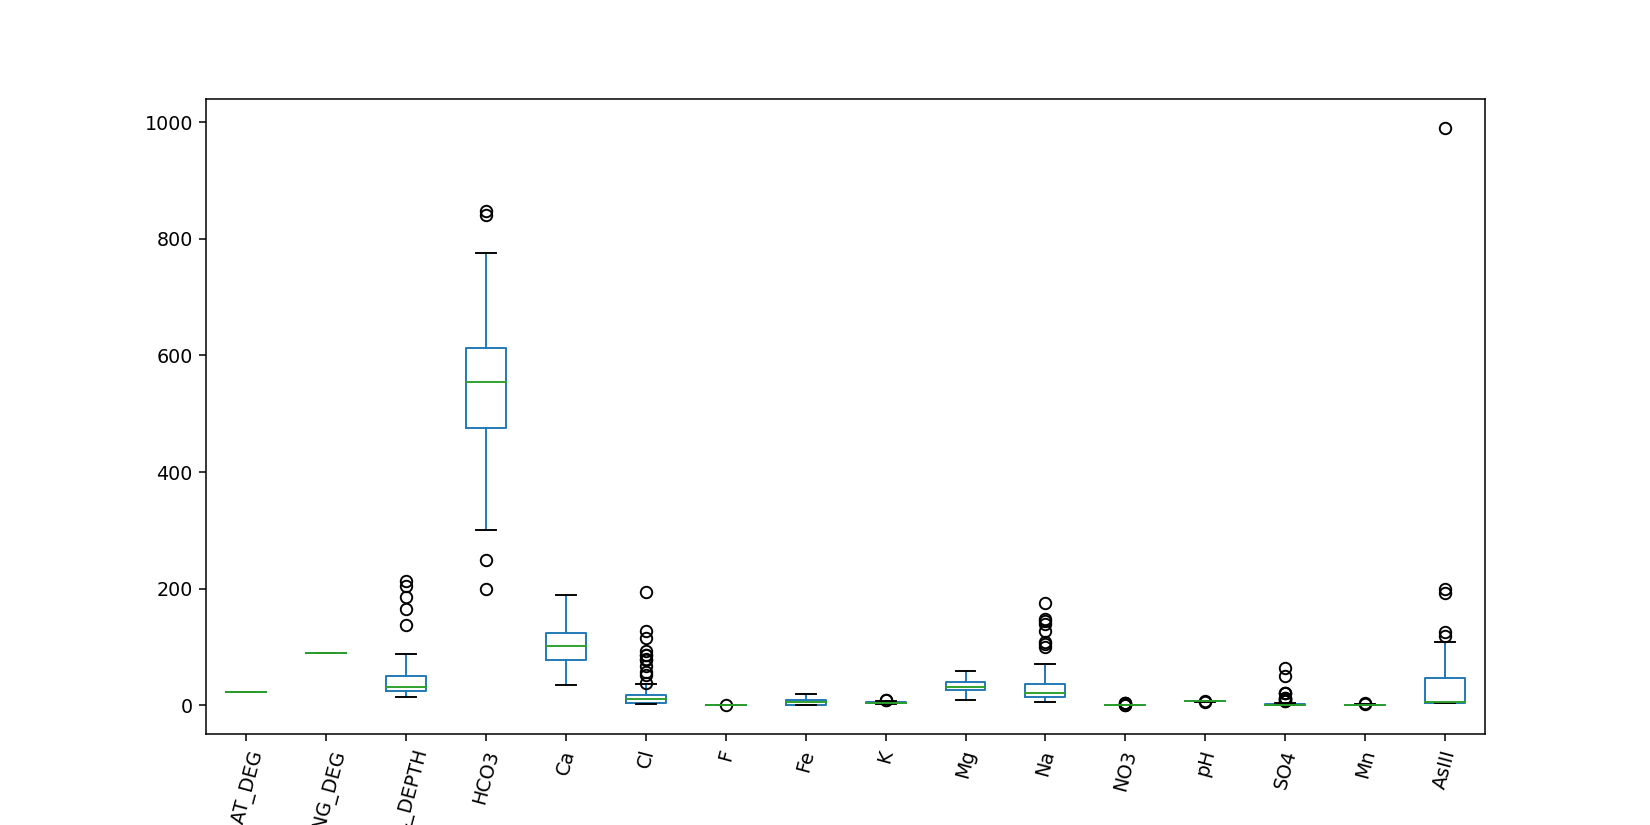

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 16 Text major ticklabel objects>)

In [45]:
df.plot.box(figsize= (12,6))
plt.xlabel('sssssssssss')
plt.xticks(rotation =75)

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LAT_DEG,64.0,23.591833,0.046104,23.4958,23.563475,23.58625,23.616850,23.6964
LONG_DEG,64.0,89.815016,0.048968,89.6975,89.785750,89.81625,89.846575,89.9025
WELL_DEPTH,64.0,46.229688,43.011585,13.7000,24.400000,32.00000,49.775000,213.4000
HCO3,64.0,541.812500,127.345658,200.0000,476.250000,554.50000,612.500000,848.0000
Ca,64.0,103.725000,35.518160,34.8000,78.275000,101.00000,123.250000,190.0000
Cl,64.0,24.675000,36.600963,1.8000,4.650000,10.45000,17.925000,195.0000
F,64.0,0.121875,0.060968,0.0200,0.087500,0.12000,0.150000,0.4000
Fe,64.0,5.642125,4.923974,0.0520,0.866000,5.55000,8.500000,19.6000
K,64.0,4.965625,1.364891,2.6000,3.975000,4.75000,5.725000,8.6000
Mg,64.0,32.680000,10.096984,8.9200,25.900000,32.10000,39.700000,59.5000


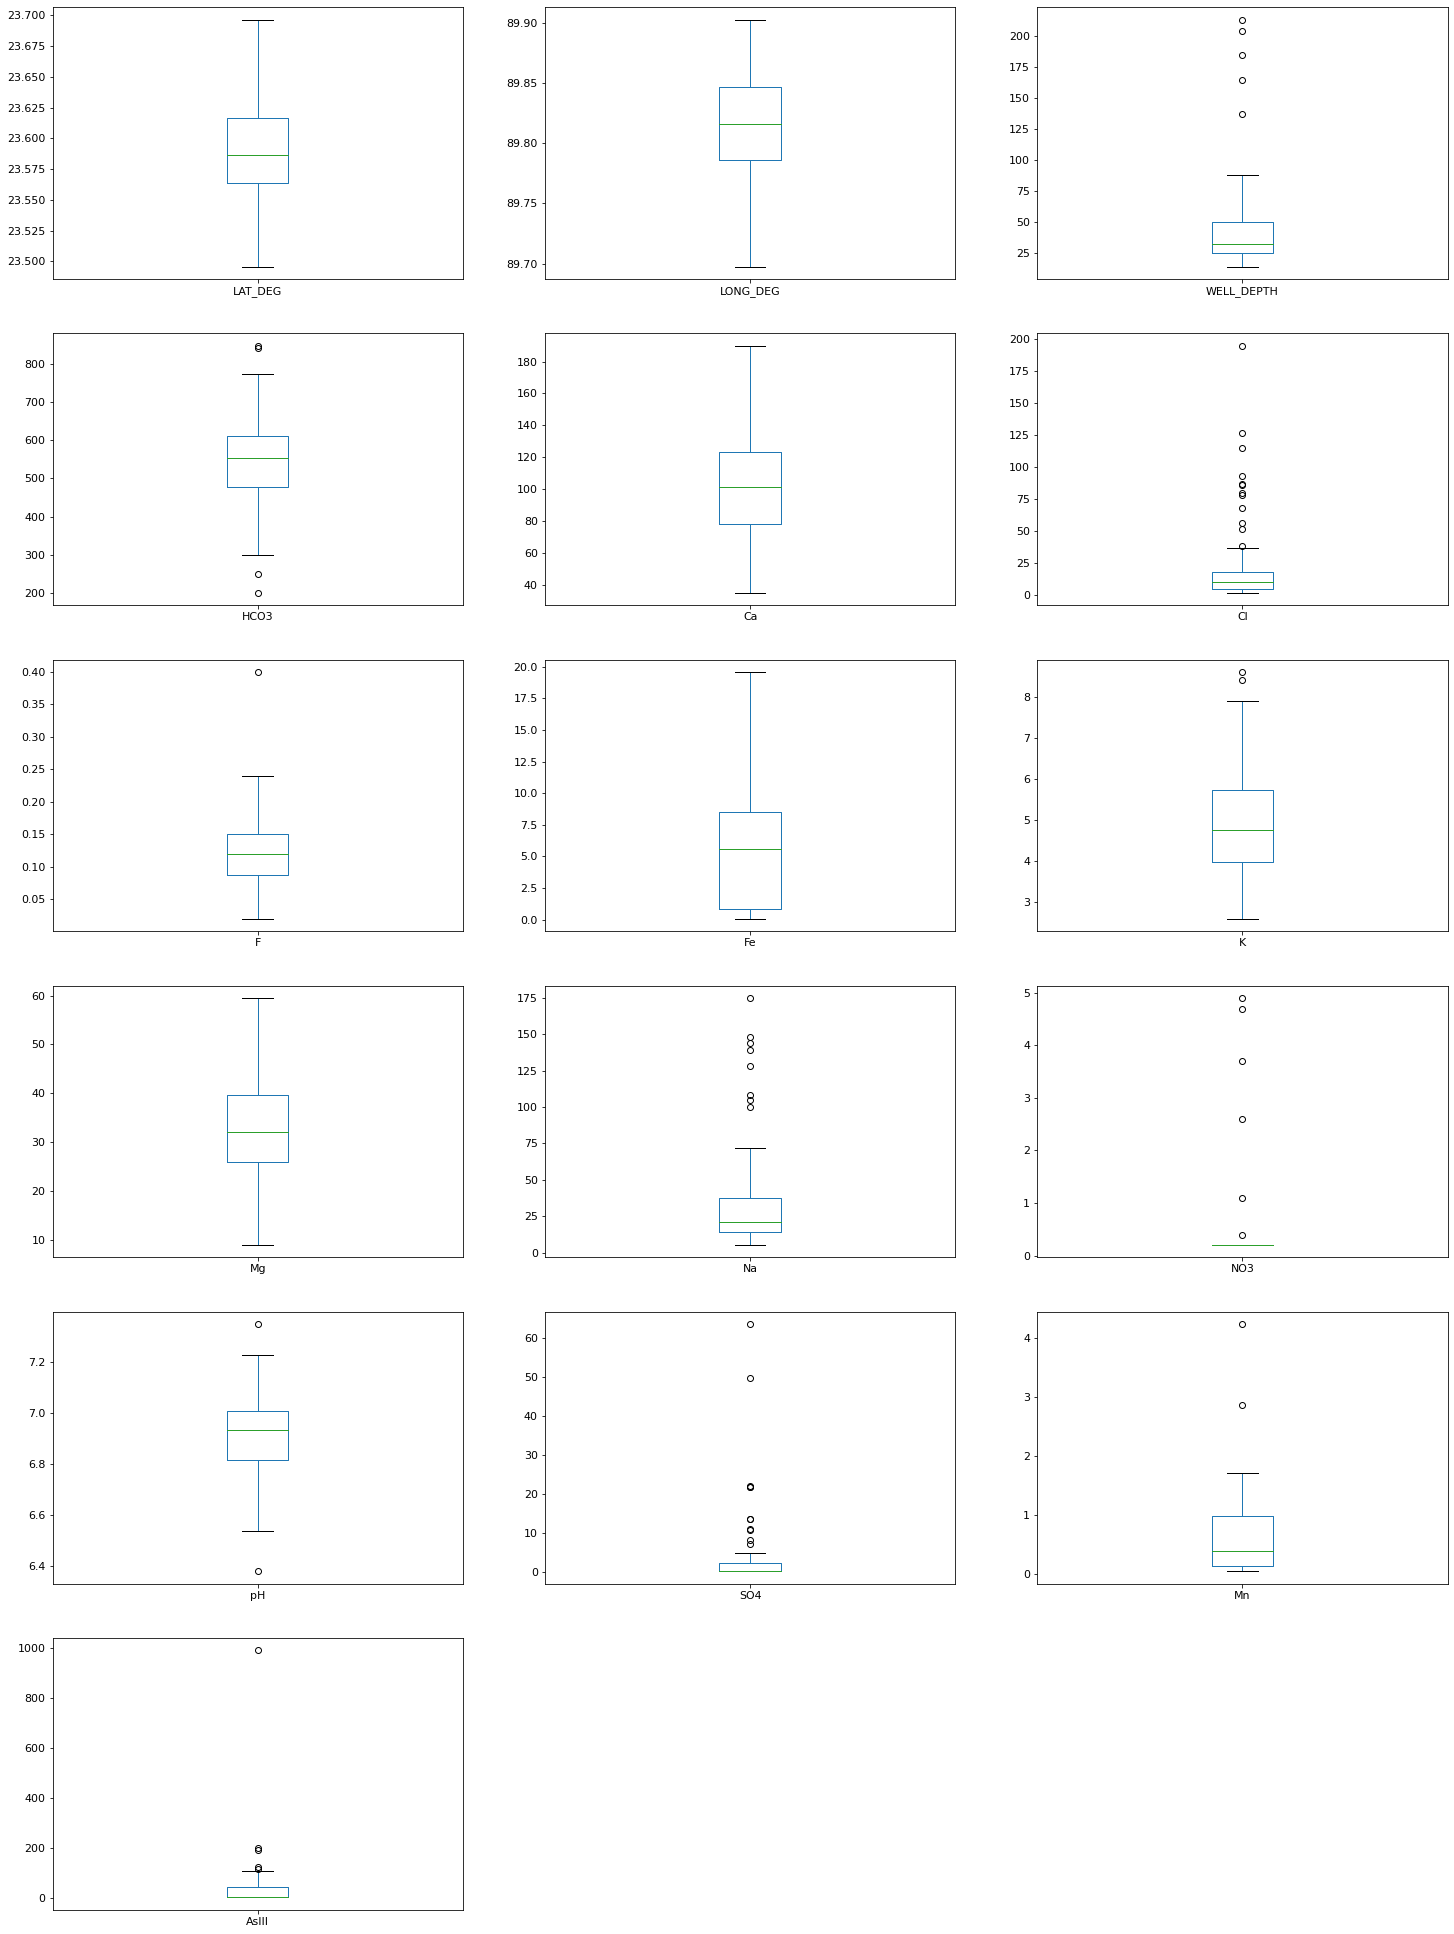

In [51]:
df.plot(kind='box',figsize = (25,35), subplots=True,layout = (6,3), sharey=False,sharex=False, fontsize=11) 
plt.show()

<IPython.core.display.Javascript object>


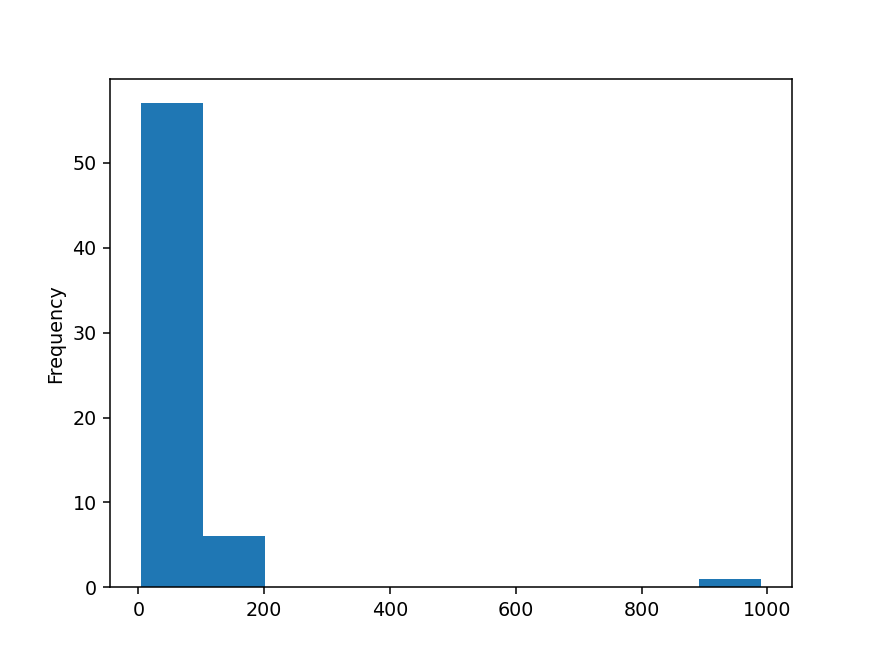

<IPython.core.display.Javascript object>


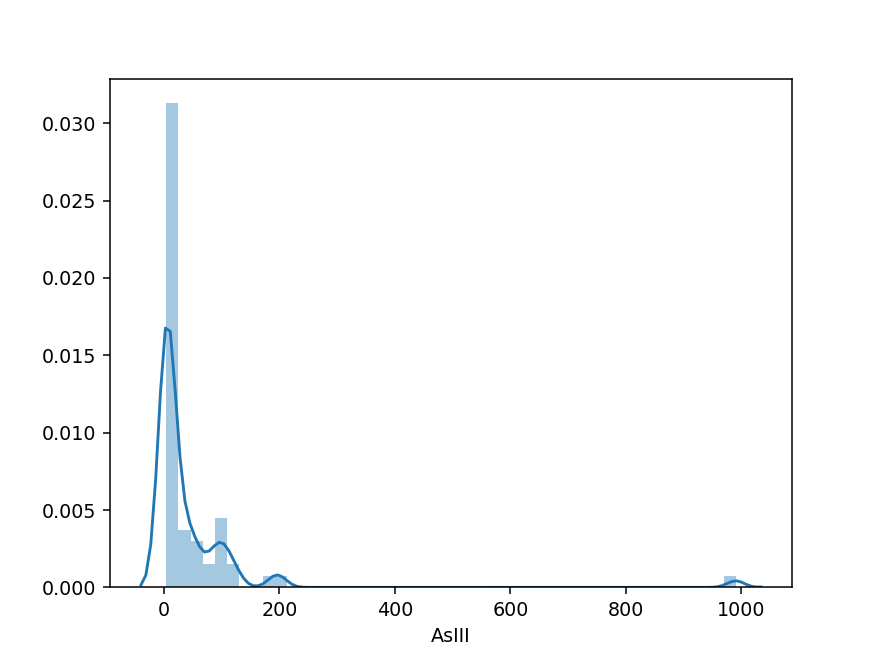

In [60]:
df.AsIII.plot(kind = 'hist')
plt.figure()
sns.distplot(df.AsIII)

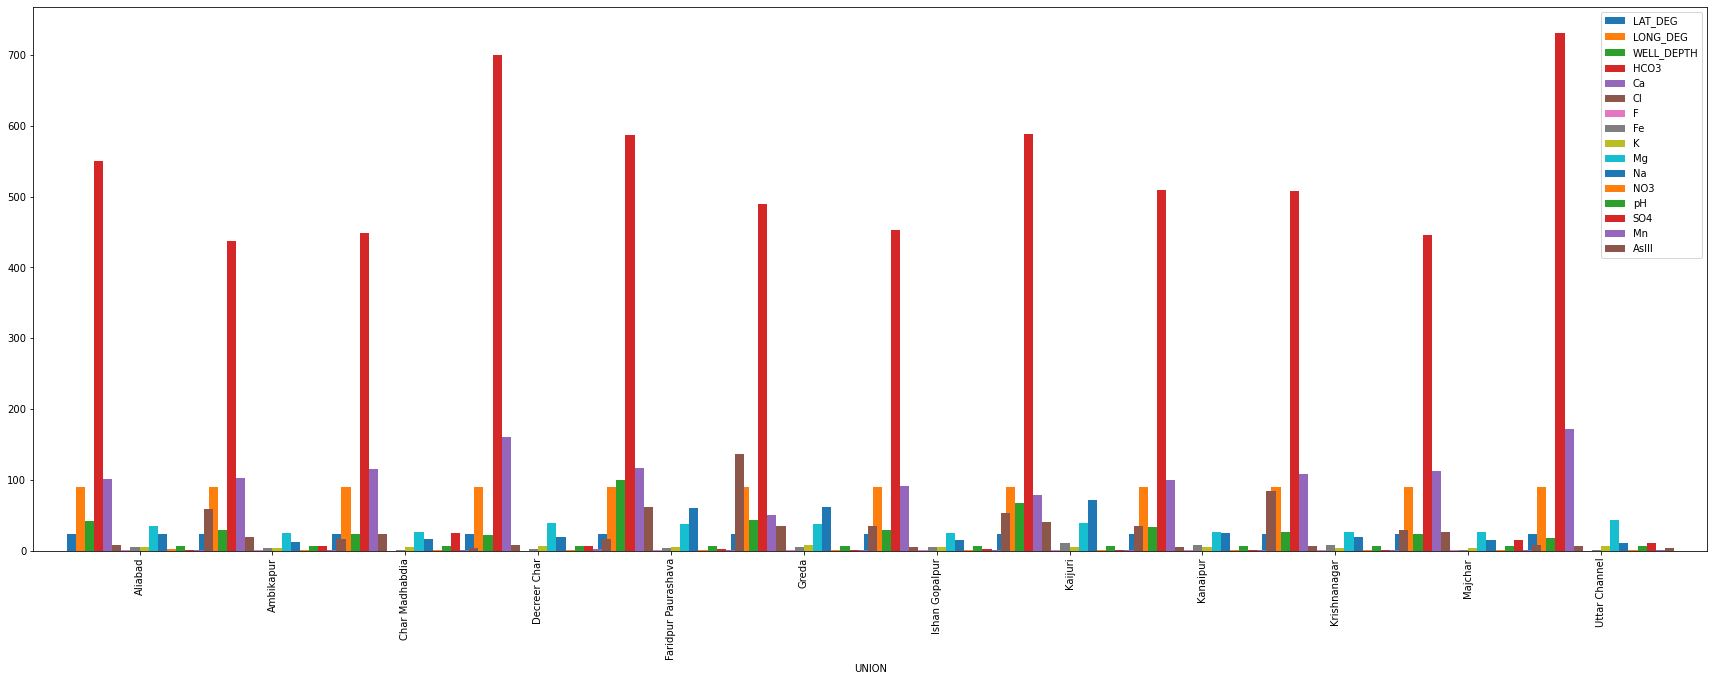

In [68]:
df.groupby('UNION').mean().plot(kind = 'bar', figsize = (30,10), width = 1.1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

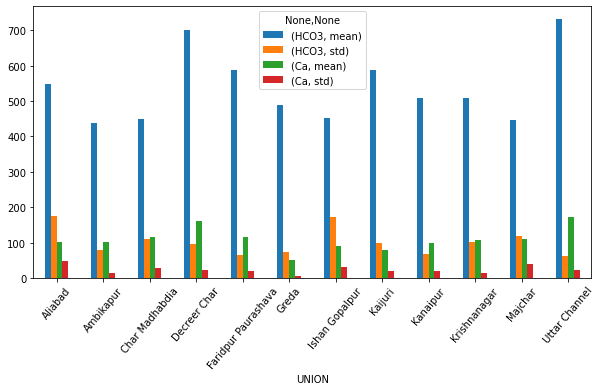

In [6]:

df.groupby('UNION')[['HCO3','Ca']].agg(['mean','std']).plot(kind='bar',figsize = (10,5))
plt.xticks(rotation = 50)

In [4]:
x=df.groupby('UNION')[['HCO3','Ca']].agg(['mean','std'])
x

HCO3                      Ca           
                           mean         std        mean        std
UNION                                                             
Aliabad              549.714286  173.942245  101.071429  46.959582
Ambikapur            437.000000   80.430094  102.066667  13.431803
Char Madhabdia       448.250000  111.158670  115.150000  29.176874
Decreer Char         700.750000   97.112907  160.750000  22.940139
Faridpur Paurashava  587.750000   64.068602  116.050000  19.131649
Greda                489.333333   73.819600   49.833333   6.274021
Ishan Gopalpur       452.750000  171.886348   91.500000  31.431513
Kaijuri              588.846154   98.469831   78.676923  20.028653
Kanaipur             509.000000   68.760454   99.900000  19.642810
Krishnanagar         508.000000  102.056847  108.733333  14.196291
Majchar              445.800000  119.426546  111.700000  39.169248
Uttar Channel        731.500000   61.518290  172.000000  22.627417

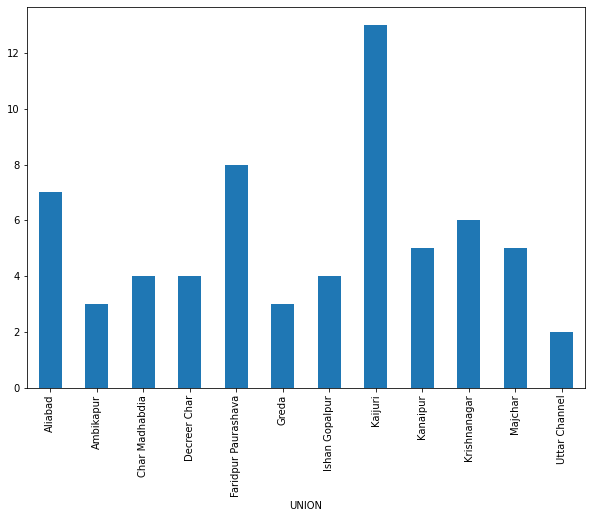

In [7]:
df.groupby(['UNION']).count()['HCO3'].plot(kind='bar',figsize=(10,7))

In [ ]:
missing_colnames=[]
for i in bigmacro.drop(['Date','Regime'],axis=1):
    observations=len(bigmacro)-bigmacro[i].count()
    if (observations>10):
        print(i+':'+str(observations))
        missing_colnames.append(i)
 
bigmacro=bigmacro.drop(labels=missing_colnames, axis=1)

#rows with missing values
bigmacro=bigmacro.dropna(axis=0)

bigmacro.shape

# missing value

In [58]:
df = pd.DataFrame([[1,9, 2,6.6],[2, 5,   np.nan, 8],   [1, np.nan, np.nan,7.8]] ,columns=['A', 'B', 'C','D'] )
df   

,A,B,C,D
0,1,9.0,2.0,6.6
1,2,5.0,NaN,8.0
2,1,NaN,NaN,7.8


In [64]:
df.replace(np.nan,0 )

,A,B,C,D
0,1,9.0,2.0,6.6
1,2,5.0,0.0,8.0
2,1,0.0,0.0,7.8


In [56]:
df.dropna()

,A,B,C,D
0,1,9.0,2.0,6.6


In [57]:
df.dropna(axis ='columns', inplace = True)
df


,A,D
0,1,6.6
1,2,8.0
2,1,7.8


In [21]:
 df.fillna(df.median()) 

,A,B,C,D
0,1,9.0,2.0,6.6
1,2,5.0,2.0,8.0
2,1,7.0,2.0,7.8


In [68]:
df

,A,B,C,D
0,1.0,NaN,2.0,6.6
1,2.0,NaN,NaN,8.0
2,1.5,NaN,NaN,7.8


In [55]:
 df.dropna(axis='columns',thresh = 2) #keep those columns which have at least 2 non missing values

,A,D
0,1.0,6.6
1,2.0,8.0
2,NaN,7.8


In [34]:
df = pd.read_csv('D:\AI\data/train price.csv')
len(df)


1460

In [4]:
df=df.set_index(pd.to_datetime(df['YearBuilt'], format='%Y'))
# df.index=df.index.to_period('Y')


In [40]:
msv = (df.isna().sum()/len(df)*100).sort_values(ascending = False)[:20]
msk=msv[msv>10].index
msk

Index([], dtype='object')

In [46]:
df = df.drop(df[msk], axis= 1)
df.GarageCars.isna().sum()

0

In [41]:
msv

GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageCond      5.547945
GarageQual      5.547945
BsmtExposure    2.602740
BsmtFinType2    2.602740
BsmtFinType1    2.534247
BsmtCond        2.534247
BsmtQual        2.534247
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
RoofMatl        0.000000
RoofStyle       0.000000
SalePrice       0.000000
Exterior1st     0.000000
Exterior2nd     0.000000
YearBuilt       0.000000
ExterQual       0.000000
dtype: float64

In [11]:
1460*.90


1314.0

In [12]:
x=df.dropna(axis='columns',thresh = 1314)
x.shape

(1460, 75)

<IPython.core.display.Javascript object>


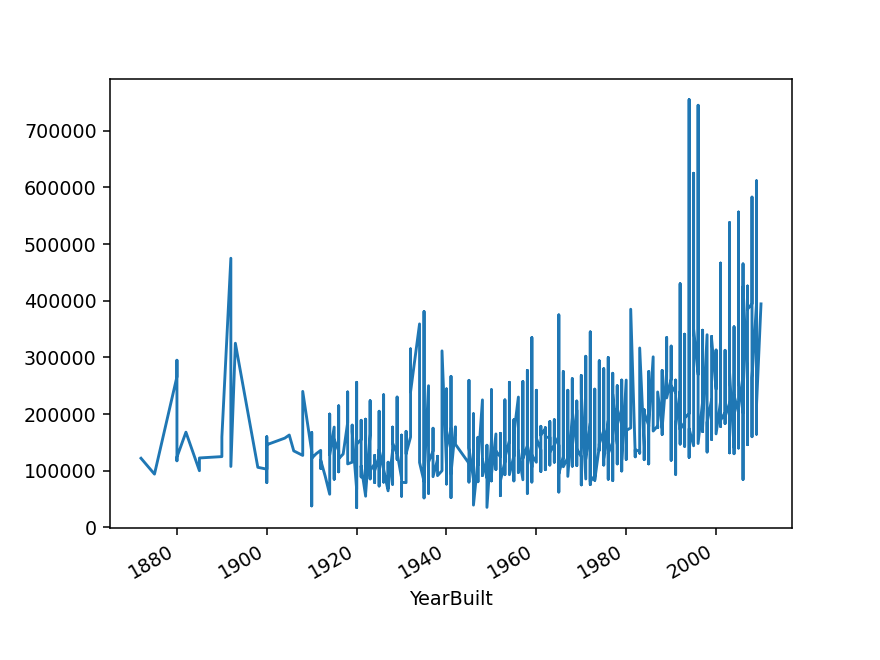

In [5]:
df.SalePrice.plot()

In [21]:
msv =( (df.isnull().sum() / len(df)) * 100).sort_values(ascending=False)[:20]
msv


PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Utilities        0.000000
dtype: float64

In [7]:
msv=msv.drop(msv[msv <10 ].index).index 
msv


Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage'],
      dtype='object')

In [8]:
df=df.drop(msv,axis=1)
df.shape

(1460, 75)

In [47]:
df.GarageCond 

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1455    TA
1456    TA
1457    TA
1458    TA
1459    TA
Name: GarageCond, Length: 1460, dtype: object

In [21]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(df[col].mean())

In [48]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna(method = 'ffill')

In [25]:
df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [34]:
msv =( (df.isnull().sum() / len(df)) * 100).sort_values(ascending=False)[:20]
msv

SalePrice       0.0
YearRemodAdd    0.0
RoofMatl        0.0
Exterior1st     0.0
Exterior2nd     0.0
MasVnrType      0.0
MasVnrArea      0.0
ExterQual       0.0
ExterCond       0.0
Foundation      0.0
BsmtQual        0.0
BsmtCond        0.0
BsmtExposure    0.0
BsmtFinType1    0.0
BsmtFinSF1      0.0
BsmtFinType2    0.0
BsmtFinSF2      0.0
RoofStyle       0.0
YearBuilt       0.0
TotalBsmtSF     0.0
dtype: float64

In [33]:
df= df.fillna('bfill')

<IPython.core.display.Javascript object>


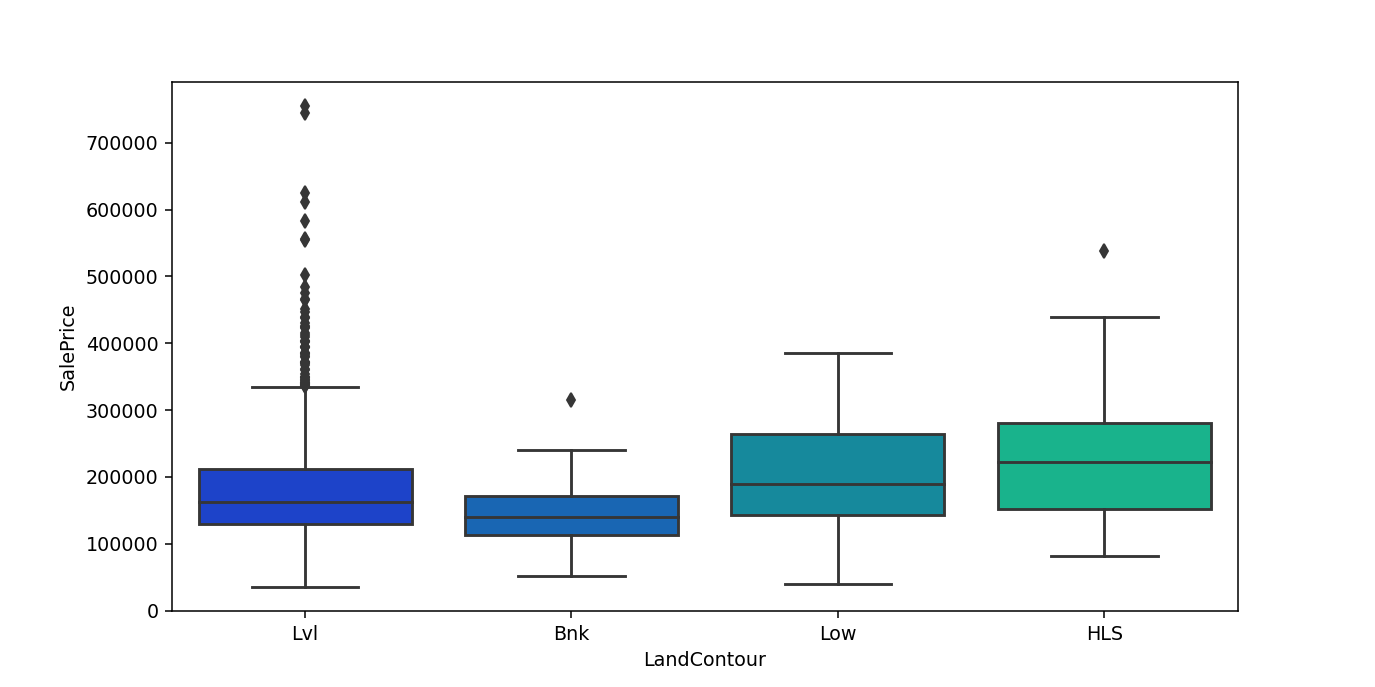

In [50]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='LandContour',y='SalePrice',data=df,palette='winter')

<IPython.core.display.Javascript object>


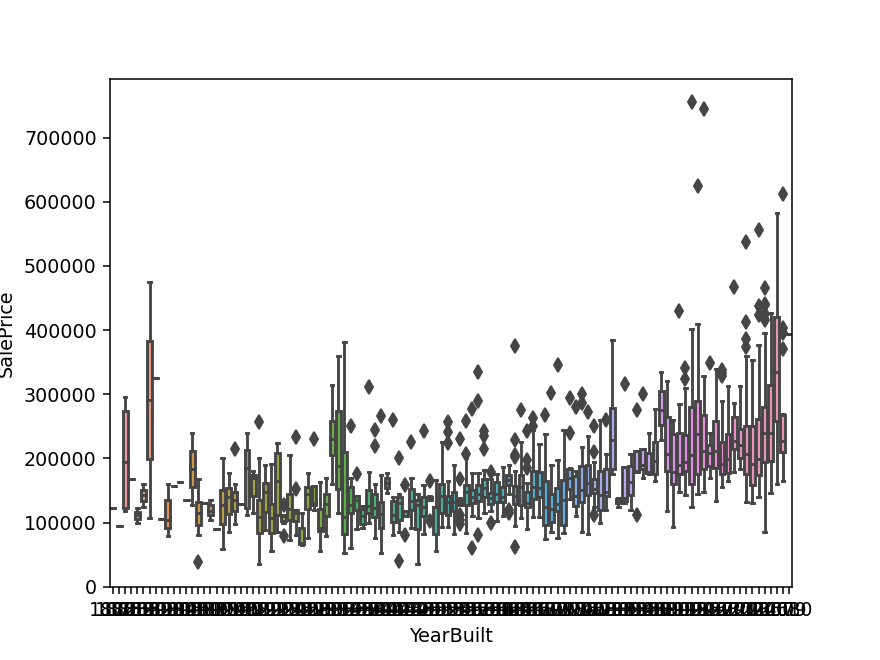

In [52]:
plt.figure()
sns.boxplot('YearBuilt','SalePrice',data=df)

<IPython.core.display.Javascript object>


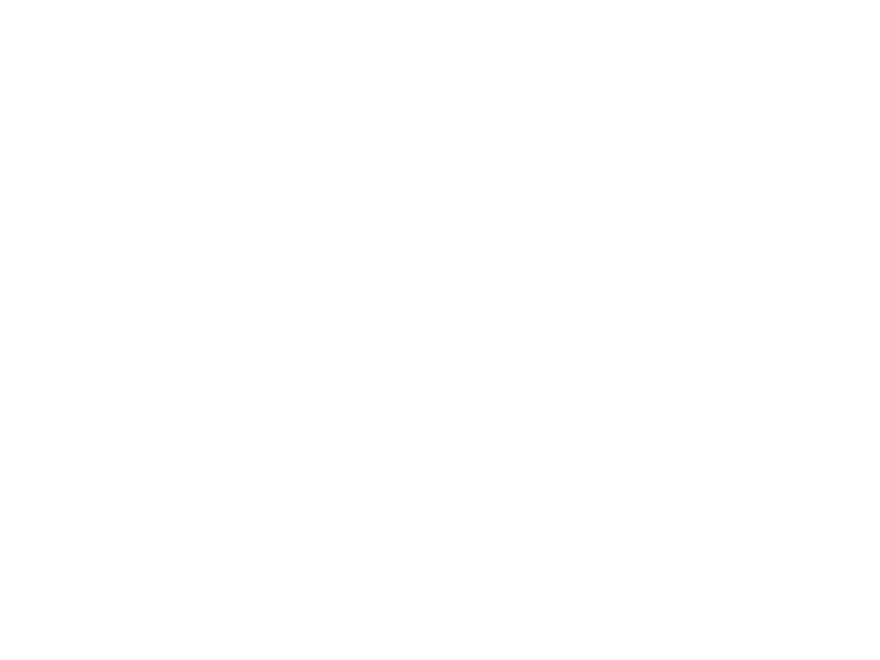

<IPython.core.display.Javascript object>


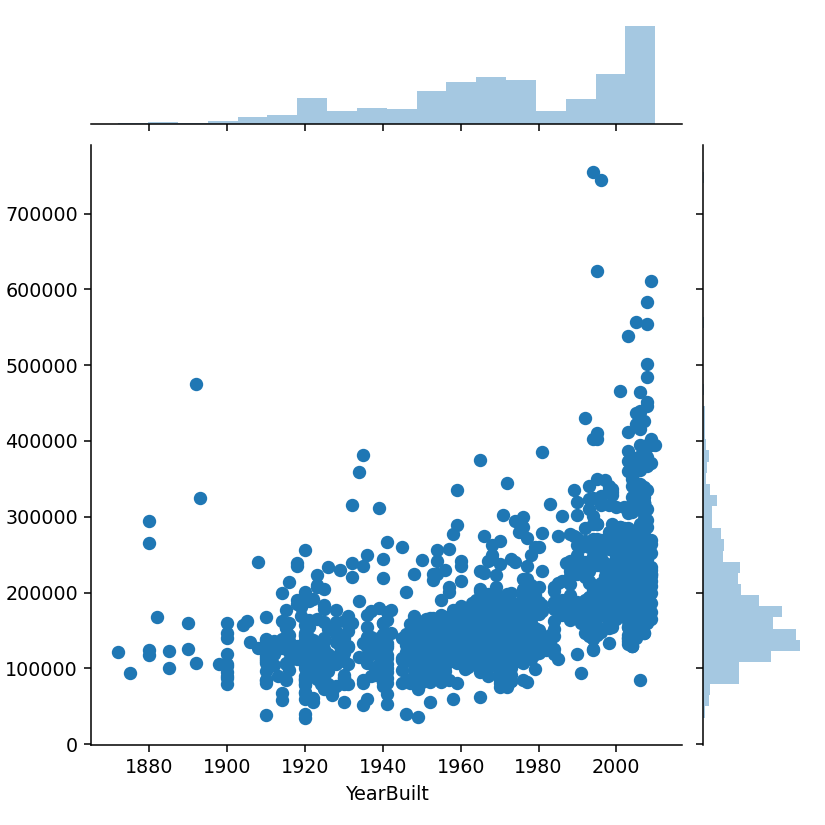

In [54]:
plt.figure()
sns.jointplot('YearBuilt','SalePrice',data=df)


In [2]:
import pandas as pd
import numpy as np
# %matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('D:\AI\data/train price.csv')
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df = pd.DataFrame([[1,9, 2,6.6],[2, 5,   np.nan, 8],   [1, np.nan, np.nan,7.8]] ,columns=['A', 'B', 'C','D'] )
df

,A,B,C,D
0,1,9.0,2.0,6.6
1,2,5.0,NaN,8.0
2,1,NaN,NaN,7.8


In [5]:
df.isna().sum()

A    0
B    1
C    2
D    0
dtype: int64

In [9]:
df.dropna(axis = 'columns', inplace = True)

In [16]:
df

,A,B,C,D
0,1,9.0,2.0,6.6
1,2,5.0,NaN,8.0
2,1,NaN,NaN,7.8


In [30]:
df.fillna(method ='ffill',inplace =True )

In [6]:
df.replace(np.nan,0)

,A,B,C,D
0,1,9.0,2.0,6.6
1,2,5.0,0.0,8.0
2,1,0.0,0.0,7.8


In [53]:
df = pd.read_csv('D:\AI\data/train price.csv')
df.shape

(1460, 81)

In [60]:
msk=(df.isna().sum()/len(df)*100).sort_values(ascending=False)[:20]
# msk= msk[msk>10].index
# msk

In [59]:
df=df.drop(df[msk], axis=1)


In [48]:
df.shape

(1460, 75)

In [54]:
x=df.dropna(axis =1,thresh =1314)

In [55]:
x.shape

(1460, 75)

In [61]:
msk

GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageCond      5.547945
GarageQual      5.547945
BsmtExposure    2.602740
BsmtFinType2    2.602740
BsmtFinType1    2.534247
BsmtCond        2.534247
BsmtQual        2.534247
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
RoofMatl        0.000000
RoofStyle       0.000000
SalePrice       0.000000
Exterior1st     0.000000
Exterior2nd     0.000000
YearBuilt       0.000000
ExterQual       0.000000
dtype: float64

In [62]:
df=df.dropna()

In [63]:
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [ ]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna(method = 'ffill')

In [51]:
df = pd.read_csv("flights-ts.csv.gz", parse_dates=True)
df.head()

,Unnamed: 0,MDW,ORD
0,2000-01-01 00:00:00,NaN,2.0
1,2000-01-01 01:00:00,NaN,6.0
2,2000-01-01 08:00:00,NaN,2.0
3,2000-01-01 09:00:00,1.0,12.0
4,2000-01-01 10:00:00,6.0,12.0


In [11]:
df.rename(columns = {'Unnamed: 0':'Time'},inplace = True)

In [16]:
df.Time = pd.to_datetime(df.Time, format = '%Y-%m-%d')

In [17]:
df.Time.dt.day_name()

0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
            ...   
117405    Thursday
117406    Thursday
117407    Thursday
117408    Thursday
117409      Friday
Name: Time, Length: 117410, dtype: object

In [2]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv("flights-ts.csv.gz",parse_dates = True,index_col = 0)
df.head()


,MDW,ORD
2000-01-01 00:00:00,NaN,2.0
2000-01-01 01:00:00,NaN,6.0
2000-01-01 08:00:00,NaN,2.0
2000-01-01 09:00:00,1.0,12.0
2000-01-01 10:00:00,6.0,12.0


In [46]:
df.rename(columns={'Unnamed: 0':'time'},inplace= True)
df.head()
len(df)

117410

In [16]:
df.index

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:00:00',
               '2000-01-01 08:00:00', '2000-01-01 09:00:00',
               '2000-01-01 10:00:00', '2000-01-01 11:00:00',
               '2000-01-01 12:00:00', '2000-01-01 13:00:00',
               '2000-01-01 14:00:00', '2000-01-01 15:00:00',
               ...
               '2015-12-31 15:00:00', '2015-12-31 16:00:00',
               '2015-12-31 17:00:00', '2015-12-31 18:00:00',
               '2015-12-31 19:00:00', '2015-12-31 20:00:00',
               '2015-12-31 21:00:00', '2015-12-31 22:00:00',
               '2015-12-31 23:00:00', '2016-01-01 00:00:00'],
              dtype='datetime64[ns]', length=117410, freq=None)

In [8]:
df2 = pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv",
                    parse_dates=True,index_col=0)


In [9]:
df2= df2.iloc[:,[1,3]]
df2

,Lo 30,Hi 30
192607,-0.43,2.68
192608,3.90,2.09
192609,-1.08,0.16
192610,-3.32,-3.06
192611,-0.46,3.09
...,...,...
201808,3.47,2.87
201809,-2.24,0.08
201810,-10.76,-7.63
201811,-2.08,2.19


In [10]:
df2.index=pd.to_datetime(df2.index, format ='%Y%m')

<IPython.core.display.Javascript object>


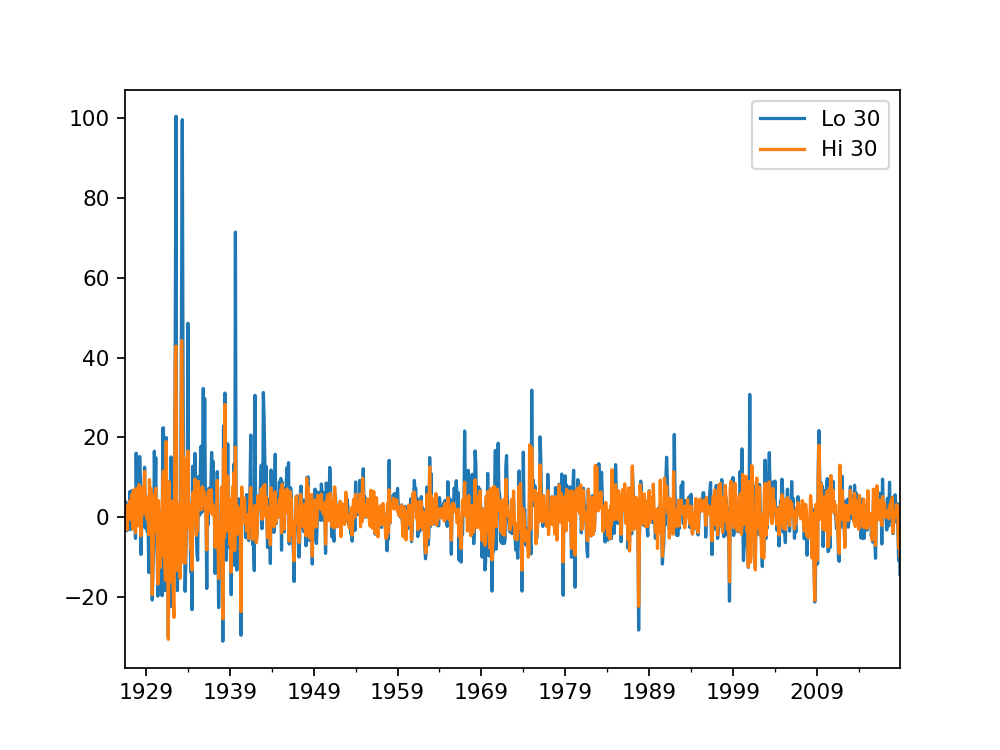

In [12]:
df2.plot()

In [74]:
df = pd.read_csv("flights-ts.csv.gz",parse_dates = True,index_col = 0)
df.head()

,MDW,ORD
2000-01-01 00:00:00,NaN,2.0
2000-01-01 01:00:00,NaN,6.0
2000-01-01 08:00:00,NaN,2.0
2000-01-01 09:00:00,1.0,12.0
2000-01-01 10:00:00,6.0,12.0


In [75]:
df['2000':'2010']

,MDW,ORD
2000-01-01 00:00:00,NaN,2.0
2000-01-01 01:00:00,NaN,6.0
2000-01-01 08:00:00,NaN,2.0
2000-01-01 09:00:00,1.0,12.0
2000-01-01 10:00:00,6.0,12.0
...,...,...
2010-12-31 19:00:00,7.0,47.0
2010-12-31 20:00:00,16.0,42.0
2010-12-31 21:00:00,17.0,37.0
2010-12-31 22:00:00,11.0,44.0


In [76]:
df.idxmax().dt.day_name()

MDW    Thursday
ORD      Friday
dtype: object

In [77]:
df['Day']=df.index.day

df.Day = pd.to_datetime(df.Day,format ='%d')
df[:40]

,MDW,ORD,Day
2000-01-01 00:00:00,NaN,2.0,1900-01-01
2000-01-01 01:00:00,NaN,6.0,1900-01-01
2000-01-01 08:00:00,NaN,2.0,1900-01-01
2000-01-01 09:00:00,1.0,12.0,1900-01-01
2000-01-01 10:00:00,6.0,12.0,1900-01-01
2000-01-01 11:00:00,2.0,17.0,1900-01-01
2000-01-01 12:00:00,6.0,20.0,1900-01-01
2000-01-01 13:00:00,5.0,38.0,1900-01-01
2000-01-01 14:00:00,8.0,50.0,1900-01-01
2000-01-01 15:00:00,9.0,24.0,1900-01-01


In [78]:
df['d_name']=df.Day.dt.day_name()
df

,MDW,ORD,Day,d_name
2000-01-01 00:00:00,NaN,2.0,1900-01-01,Monday
2000-01-01 01:00:00,NaN,6.0,1900-01-01,Monday
2000-01-01 08:00:00,NaN,2.0,1900-01-01,Monday
2000-01-01 09:00:00,1.0,12.0,1900-01-01,Monday
2000-01-01 10:00:00,6.0,12.0,1900-01-01,Monday
...,...,...,...,...
2015-12-31 20:00:00,18.0,37.0,1900-01-31,Wednesday
2015-12-31 21:00:00,2.0,72.0,1900-01-31,Wednesday
2015-12-31 22:00:00,13.0,38.0,1900-01-31,Wednesday
2015-12-31 23:00:00,12.0,15.0,1900-01-31,Wednesday


In [79]:
df.index=df.index.to_period('D')
df


,MDW,ORD,Day,d_name
2000-01-01,NaN,2.0,1900-01-01,Monday
2000-01-01,NaN,6.0,1900-01-01,Monday
2000-01-01,NaN,2.0,1900-01-01,Monday
2000-01-01,1.0,12.0,1900-01-01,Monday
2000-01-01,6.0,12.0,1900-01-01,Monday
...,...,...,...,...
2015-12-31,18.0,37.0,1900-01-31,Wednesday
2015-12-31,2.0,72.0,1900-01-31,Wednesday
2015-12-31,13.0,38.0,1900-01-31,Wednesday
2015-12-31,12.0,15.0,1900-01-31,Wednesday


In [73]:
df.index+5

PeriodIndex(['2000-01-06', '2000-01-06', '2000-01-06', '2000-01-06',
             '2000-01-06', '2000-01-06', '2000-01-06', '2000-01-06',
             '2000-01-06', '2000-01-06',
             ...
             '2016-01-05', '2016-01-05', '2016-01-05', '2016-01-05',
             '2016-01-05', '2016-01-05', '2016-01-05', '2016-01-05',
             '2016-01-05', '2016-01-06'],
            dtype='period[D]', length=117410, freq='D')

In [77]:
s=df.resample('D').sum()
s

,MDW,ORD
2000-01-01,69.0,504.0
2000-01-02,137.0,743.0
2000-01-03,144.0,738.0
2000-01-04,156.0,770.0
2000-01-05,156.0,775.0
...,...,...
2015-12-28,76.0,308.0
2015-12-29,222.0,800.0
2015-12-30,229.0,831.0
2015-12-31,189.0,740.0


<IPython.core.display.Javascript object>


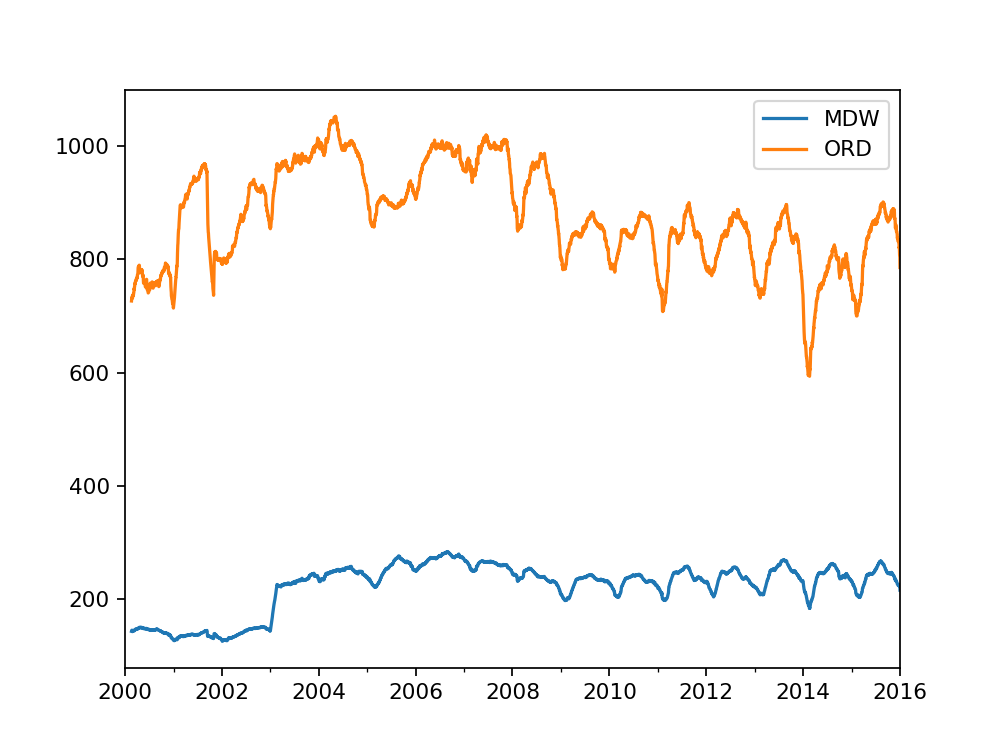

In [80]:
# plt.figure()
s.rolling(50).mean().plot()

In [6]:

pd.Timestamp('14/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('-171 days +00:00:00')

In [8]:
flts = pd.read_csv("ny-flights.csv.gz", parse_dates=['dep', 'arr'])
flts.head()

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01 00:00:00,AA,19805,N338AA,1,JFK,LAX,914.0,14.0,1238.0,13.0,0.0,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01 00:00:00,AA,19805,N335AA,3,JFK,LAX,1157.0,-3.0,1523.0,13.0,0.0,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01 00:00:00,AA,19805,N327AA,21,JFK,LAX,1902.0,2.0,2224.0,9.0,0.0,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01 00:00:00,AA,19805,N3EHAA,29,LGA,PBI,722.0,-8.0,1014.0,-26.0,0.0,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01 00:00:00,AA,19805,N319AA,117,JFK,LAX,1347.0,2.0,1706.0,1.0,0.0,2014-01-01 17:06:00,2014-01-01 13:47:00


In [26]:
flights['arr_D_td'] = pd.to_timedelta(flts['arr_delay'], unit='minute')


In [27]:
flights.arr

0       2014-01-01 12:38:00
1       2014-01-01 15:23:00
2       2014-01-01 22:24:00
3       2014-01-01 10:14:00
4       2014-01-01 17:06:00
                ...        
20812   2014-01-31 09:08:00
20813   2014-01-31 16:49:00
20814   2014-01-31 10:06:00
20815   2014-01-31 11:56:00
20816   2014-01-31 12:51:00
Name: arr, Length: 20817, dtype: datetime64[ns]

In [28]:
flights.arr + flights.arr_D_td

0       2014-01-01 12:51:00
1       2014-01-01 15:36:00
2       2014-01-01 22:33:00
3       2014-01-01 09:48:00
4       2014-01-01 17:07:00
                ...        
20812   2014-01-31 09:12:00
20813   2014-01-31 16:18:00
20814   2014-01-31 09:46:00
20815   2014-01-31 11:50:00
20816   2014-01-31 12:32:00
Length: 20817, dtype: datetime64[ns]